<a href="https://colab.research.google.com/github/JSEFERINO/JHSERIES2/blob/main/05_Series_Tiempo_Cap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Introductorio Series de Tiempo por Julio Hurtado Márquez**
## **Text: Time Series Forecasting in Python - MARCO PEIXEIRO**
## **Capítulo 3. Realizar una caminata aleatoria**

# **Introducción**
+ Identificar un proceso de caminata aleatoria
+ Comprender la función ACF
+ Clasificación de diferenciación, estacionariedad y ruido blanco.
+ Uso del gráfico ACF y diferenciación para identificar un paseo aleatorio
+ Pronosticar un paseo aleatorio.

## **Introducción a un proceso de paseo aleatorio**
+ En el capítulo anterior, comparamos diferentes métodos ingenuos de pronóstico y aprendimos que a menudo sirven como puntos de referencia para modelos más sofisticados.
+ Sin embargo, hay casos en los que los métodos más simples producirán los mejores pronósticos.
+ Este es el caso cuando nos enfrentamos a **un proceso de paseo aleatorio.**

+ *En este capítulo, aprenderá qué es un proceso de paseo aleatorio, cómo reconocerlo y cómo hacer pronósticos utilizando modelos de paseo aleatorio.*
+ A lo largo del camino, veremos los conceptos de diferenciación, estacionariedad y ruido blanco, que volveremos en capítulos posteriores a medida que desarrollemos modelos de aprendizaje estadístico más avanzados.

+ Para los ejemplos de este capítulo, **supongamos que desea comprar acciones de Alphabet Inc. (GOOGL). Lo ideal sería comprar si se espera que el precio de cierre de la acción suba en el futuro; de lo contrario, tu inversión no será rentable. Por lo tanto, decide recopilar datos sobre el precio de cierre diario de GOOGLE durante 1 año y utilizar pronósticos de series de tiempo para determinar el precio de cierre futuro de la acción. El precio de cierre de GOOGLE del 27 de abril de 2020 al 27 de abril de 2021 se muestra en la figura 3.1. En el momento de redactar este artículo, los datos posteriores al 27 de abril de 2021 aún no estaban disponibles.**

**Figura 3.1 Precio de cierre diario de GOOGL del 27 de abril de 2020 al 27 de abril de 2021**

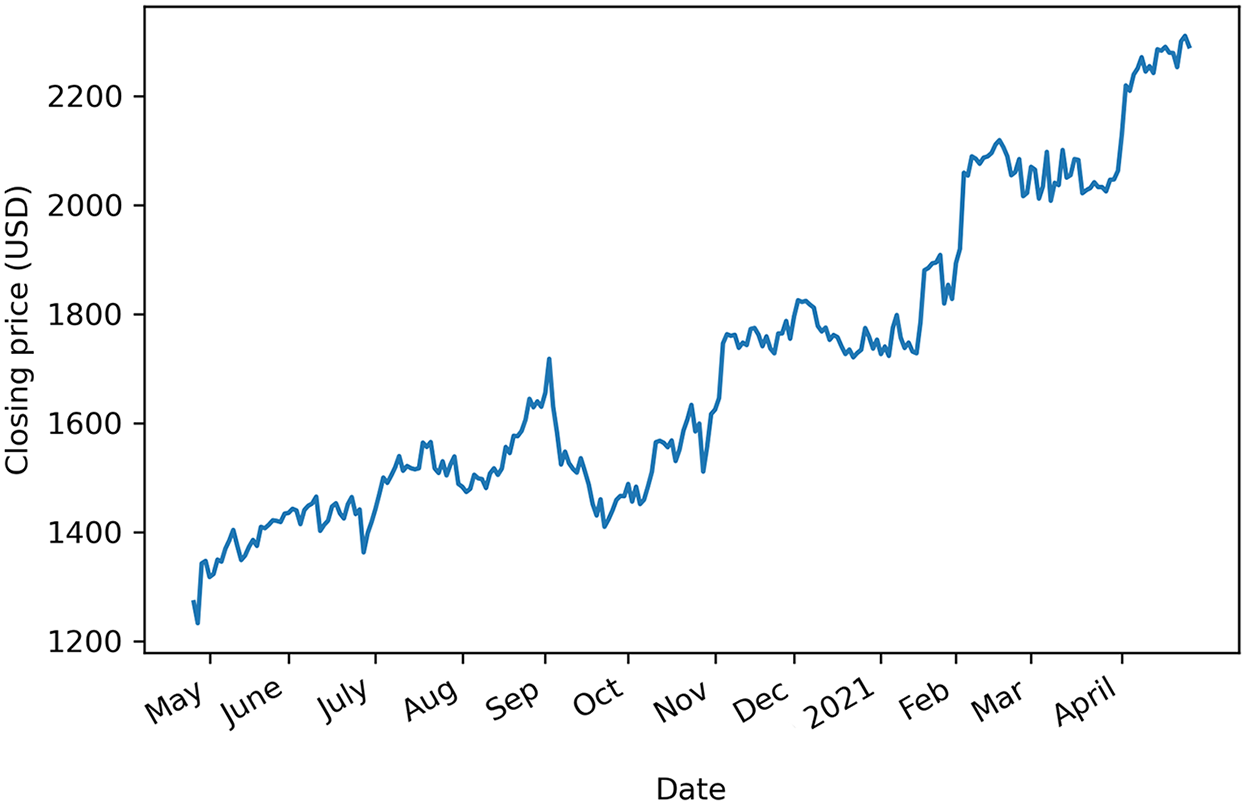

## **Introducció a un proceso de paseo aleatorio**
+ Si observamos la figura 3.1, podemos ver claramente una tendencia de largo plazo, ya que el precio de cierre aumentó entre el 28 de abril de 2020 y el 27 de abril de 2021.
+ Sin embargo, también notamos cambios abruptos en la tendencia, con períodos donde disminuye bruscamente, antes repentinamente aumentando de nuevo.

+ Resulta que el precio de cierre diario de GOOGL se puede modelar utilizando ***el modelo de paseo aleatori***o.
+ Para hacerlo, primero determinaremos si nuestro proceso es estacionario o no.
+ **En el caso de que sea un proceso no estacionario, tendremos que aplicar transformaciones, como la diferenciación , para hacerlo estacionario.**
+ Luego, podremos utilizar ***el gráfico de la función de autocorrelación*** para concluir que el precio de cierre diario de GOOGL puede aproximarse mediante el modelo de paseo aleatorio.
+ En este capítulo se cubrirán tanto la ***diferenciación*** como el ***gráfico de autocorrelación***.
+ Finalmente, concluimos el capítulo con métodos de pronóstico para predecir el precio de cierre futuro de GOOGL.

+ Al final de este capítulo, habrá dominado los conceptos de ***estacionariedad, diferenciación y autocorrelación***, que volveremos a utilizar en capítulos posteriores a medida que desarrollemos nuestras habilidades de pronóstico. Por ahora, centrémonos primero en definir el proceso de paseo aleatorio.

# **3.1 El proceso de caminata aleatoria**
+ *Un paseo aleatorio es un proceso en el que existe la misma probabilidad de subir o bajar un número aleatorio.*
+ *Esto suele observarse en datos financieros y económicos, como el precio de cierre diario de GOOGL.*
+ *Los paseos aleatorios suelen exponer largos períodos en los que se puede observar una tendencia positiva o negativa.*
+ *Suele ir acompañado de cambios bruscos de dirección.*

+ En un proceso de paseo aleatorio, decimos que el valor actual $y_t$ es una función del valor en el paso de tiempo anterior $y_{t-1}$ , una constante $C$ y un número aleatorio $ϵ_t$ , también denominado ruido blanco . Aquí, $ϵ_t$ es la realización de una **distribución normal** con media $0$.

+ Por lo tanto, podemos expresar matemáticamente un paseo aleatorio con la siguiente ecuación, donde $y_t$ es el valor en el momento actual $t$ , $C$ es una constante, $y_{t-1}$ es el valor en el paso anterior $t-1$ y $ϵ_t$ es un número aleatorio:

+ **Ecuación 3.1**
$$y_t=C+y_{t-1}+ϵ_t$$

+ **Tenga en cuenta que si la constante $C$ es distinta de cero, entonces designamos este proceso como un paseo aleatorio con _deriva_.**

# **3.1.1 Simulando un proceso de caminata aleatoria**
+ Para ayudarnos a comprender el **proceso de caminata aleatoria**, simulemos uno con Python; de esa manera, podemos entender cómo se comporta una caminata aleatoria y estudiar sus propiedades en un escenario puramente teórico.
+ Luego, trasladaremos nuestro conocimiento a nuestro ejemplo de la vida real de modelado y pronóstico del precio de cierre de GOOGL.

+ De la ecuación 3.1, sabemos que un paseo aleatorio depende de su valor anterior $y_{t-1}$ más el ruido blanco $ϵ_t$ y alguna constante $C$.
+ Para simplificar nuestra simulación, supongamos que la constante $C=0$. De esa manera, nuestro paseo aleatorio simulado se puede expresar como:

+ **Ecuación 3.2**
$$y_t=y_{t-1}+ϵ_t$$

+ Ahora debemos elegir el primer valor de nuestra secuencia simulada.
+ Nuevamente, para simplificar, inicializamos nuestra secuencia en 0. Este será el valor de $y_0=0$ .

+ Ahora podemos comenzar a construir nuestra secuencia usando la ecuación 3.2.
+ Comenzamos con nuestro valor inicial de $0$ en el momento $t = 0$.
+ Luego, de la ecuación 3.2, el valor en $t = 1$, representado por $y_1$ será igual al valor anterior $y_0$ más ruido blanco.

+ **Ecuación 3.3**
$$y_0=0$$,
$$y_1=y_{1-1}+ϵ_1=ϵ_1$$

+ **Ecuación 3.4**
$$y_1=ϵ_1$$
$$y_2=y_{2-1}+ϵ_2=ϵ_1+ϵ_2$$


+ **Ecuación 3.5**

$$y_2=ϵ_1+ϵ_2$$
$$y_3=ϵ_1+ϵ_2+ϵ_3$$

+ Si observamos la ecuación 3.5, deberíamos empezar a ver un patrón.
+ Al inicializar nuestro proceso de caminata aleatoria en $0$ y establecer la constante $C$ en $0$, determinamos que el valor en el momento $t$ es simplemente la suma del ruido blanco desde $t = 1$ hasta el momento $t$.
+ Por lo tanto, nuestro paseo aleatorio simulado respetará la ecuación 3.6, donde $y_t$ es el valor del proceso de paseo aleatorio en el momento $t$ , y $ϵ_t$ es un número aleatorio en el momento $t$ .

+ **Ecuación 3.6**

$$y_{t}=\sum\limits_{t=1}^{T}\epsilon _{t}$$

+ ***La ecuación 3.6 establece que en cualquier momento $t$ , el valor de nuestra serie temporal simulada será la suma acumulada de una serie de números aleatorios.***
+ Podemos visualizar cómo toma forma nuestra caminata aleatoria simulada en la figura 3.2.
+ Como se mencionó, dado que asignamos un valor inicial de $0$ y una $C$ constante de 0, entonces el valor en cada paso de tiempo es la suma acumulada del ruido blanco.

**Figura 3.2 Visualizando la construcción de nuestro paseo aleatorio simulado. Como puede ver, nuestro valor inicial es 0. Luego, dado que la constante también se estableció en 0, el valor de nuestro paseo aleatorio en cualquier momento es simplemente la suma acumulativa de números aleatorios, o ruido blanco.**

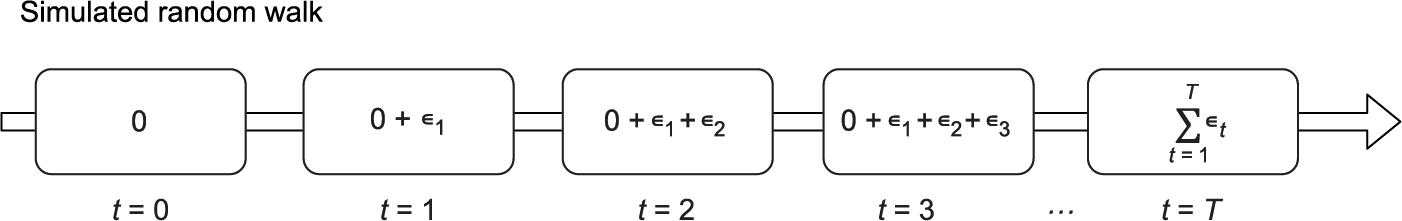

## **Ejemplo en Python**
+ Ahora estamos listos para simular nuestro proceso aleatorio usando Python.
+ Para que este ejercicio sea reproducible, necesitaremos establecer una semilla .
+ La semilla es un número entero que pasamos al random.seed.
+ De esa forma, no importa cuántas veces ejecutemos el código, se generarán los mismos números aleatorios.
+ Esto garantiza que obtendrá los mismos resultados y trazados que se describen en este capítulo.
+ Podemos trazar nuestro paseo aleatorio simulado y ver cómo se ve.
+ Dado que nuestros ejes $x$ e $y$ no tienen un significado en la vida real, simplemente los etiquetaremos como pasos de tiempo y valor respectivamente.
+ El siguiente bloque de código genera la figura 3.3.

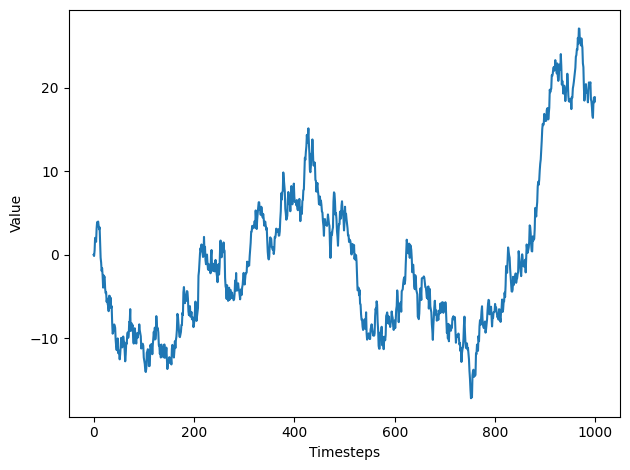

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

steps = np.random.standard_normal(1000)
steps[0]=0

random_walk = np.cumsum(steps)

fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

**Figura 3.3 Paseo aleatorio simulado. Observe cómo tenemos una tendencia positiva durante los primeros 400 pasos de tiempo, seguida de una tendencia negativa y un fuerte aumento hacia el final. Éstos son buenos indicios de un proceso de paseo aleatorio.**

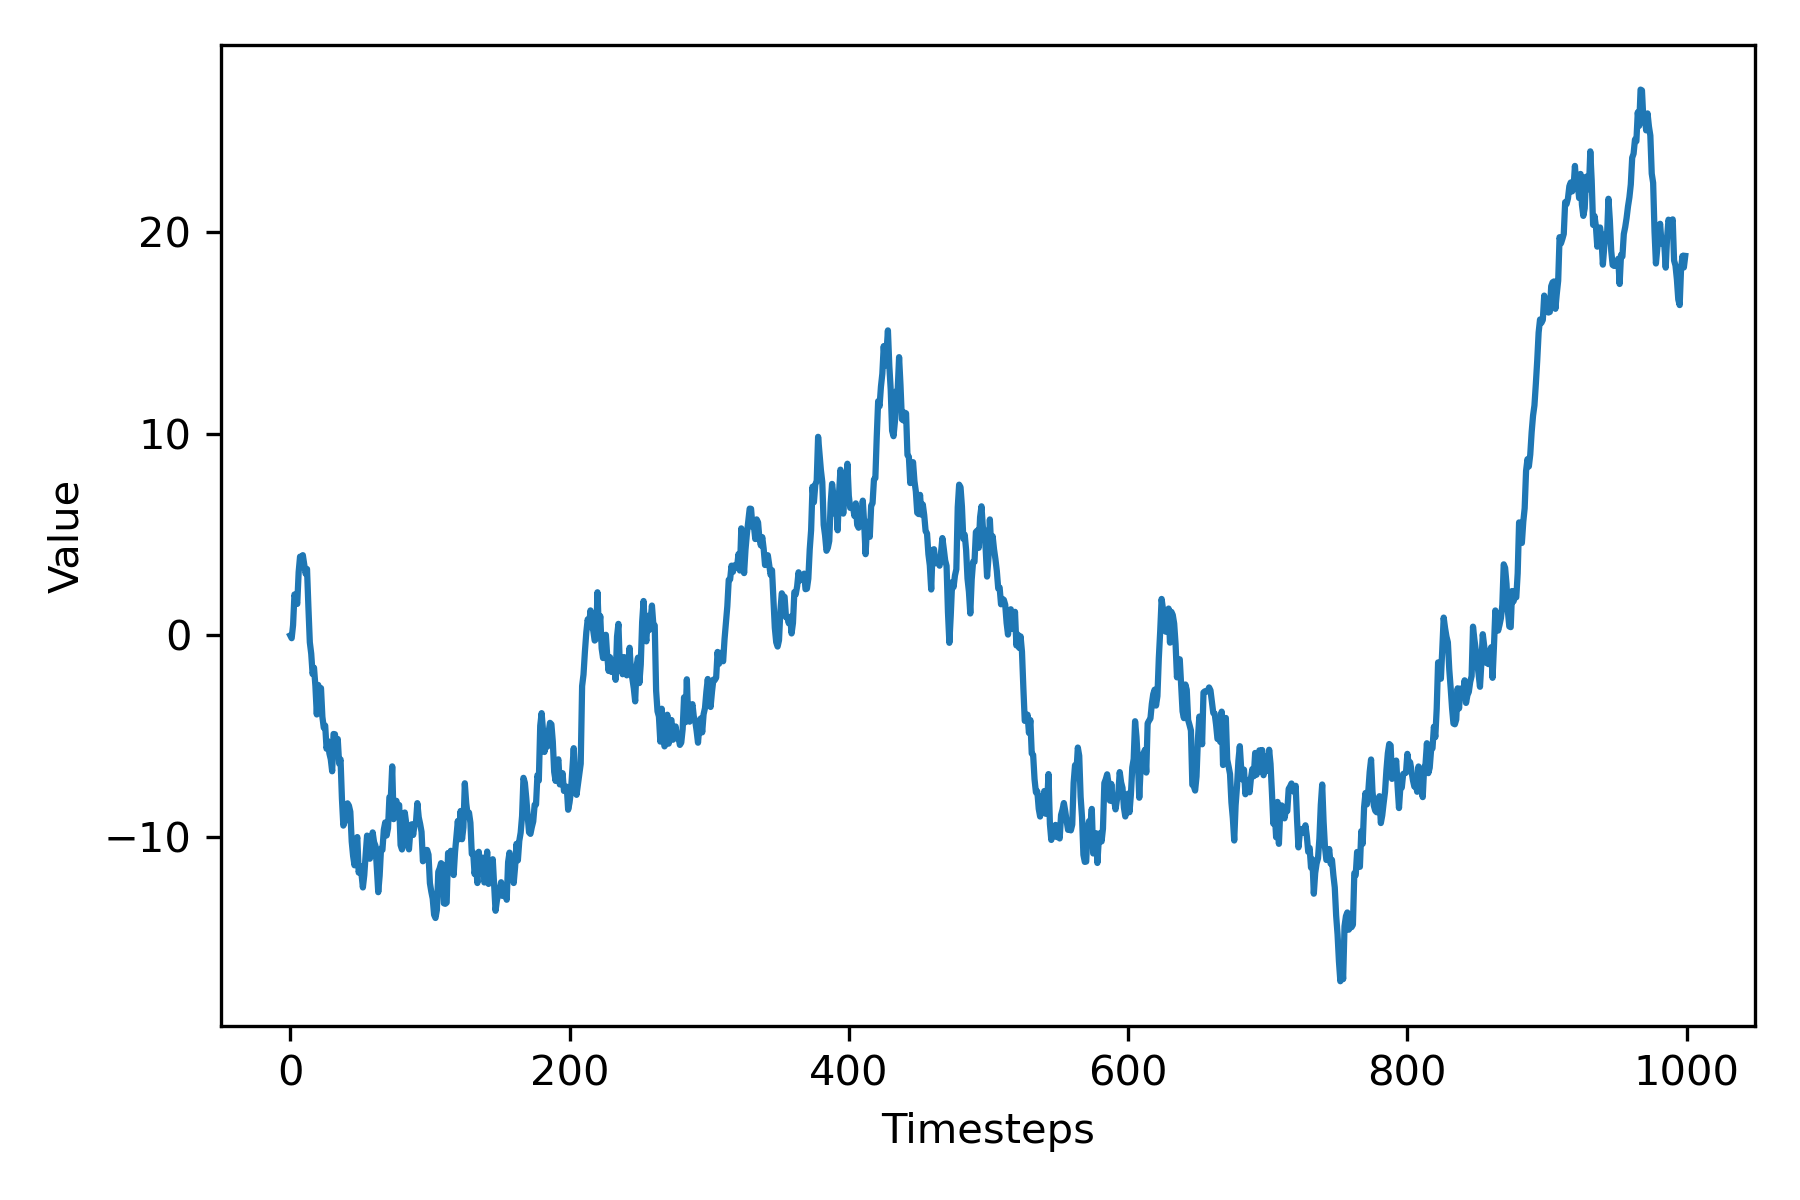

+ ***Ahora sabemos que se trata de un paseo aleatorio porque lo simulamos. Sin embargo, cuando trabajamos con datos de la vida real, necesitamos encontrar una manera de identificar si nuestra serie de tiempo es un paseo aleatorio o no. Veamos cómo podemos lograr esto.***
+ Para determinar si nuestra serie de tiempo puede aproximarse como un paseo aleatorio, debemos seguir un conjunto específico de pasos descritos en la figura 3.4.

# **3.2 Identificar un paseo aleatorio**
+ El primer paso natural es tener datos, como es nuestro caso. Luego, probamos la ***estacionariedad.***
+ ***En el caso de que nuestros datos no sean estacionarios, aplicaremos una transformación, como la diferenciación, y probaremos la estacionariedad nuevamente.***
+ Si es así, podemos trazar la ***función de autocorrelación (ACF)***.
+ ***Si el gráfico no muestra coeficientes de autocorrelación significativos, entonces podemos modelar nuestra serie de tiempo como un paseo aleatorio.***
+ ***De lo contrario, estamos en presencia de otro tipo de proceso que exploraremos en el próximo capítulo.***
+ En las siguientes subsecciones, cubriremos en detalle los conceptos de estacionariedad y autocorrelación.

## **Caminata aleatoria**
+ ***Una serie de tiempo estacionaria*** *es aquella cuyas propiedades estadísticas no cambian con el tiempo.*
+ En otras palabras, *tiene media, varianza y autocorrelación constantes*, y estas propiedades son independientes del tiempo.

+ Esto significa que ***el proceso se desarrolla de forma completamente aleatoria.***

+ Por tanto, podemos ver la **estacionariedad** como un supuesto que puede facilitarnos la vida a la hora de realizar predicciones.
+ Por supuesto, **rara vez veremos una serie temporal estacionaria en su estado original** porque a menudo estamos interesados ​​en pronosticar procesos con una tendencia de ciclos estacionales.
+ ***Aquí es cuando entran en juego modelos como ARIMA (capítulo 7) y SARIMA (capítulo 8)***.

+ **Figura 3.4 Pasos a seguir para identificar si los datos de series de tiempo pueden aproximarse como un paseo aleatorio o no. Naturalmente, el primer paso es recopilar los datos. Luego probamos la estacionariedad. Si no es estacionario, aplicamos transformaciones hasta lograr la estacionariedad. Luego podemos trazar la función de autocorrelación (ACF). Si no hay autocorrelación, tenemos un paseo aleatorio.**

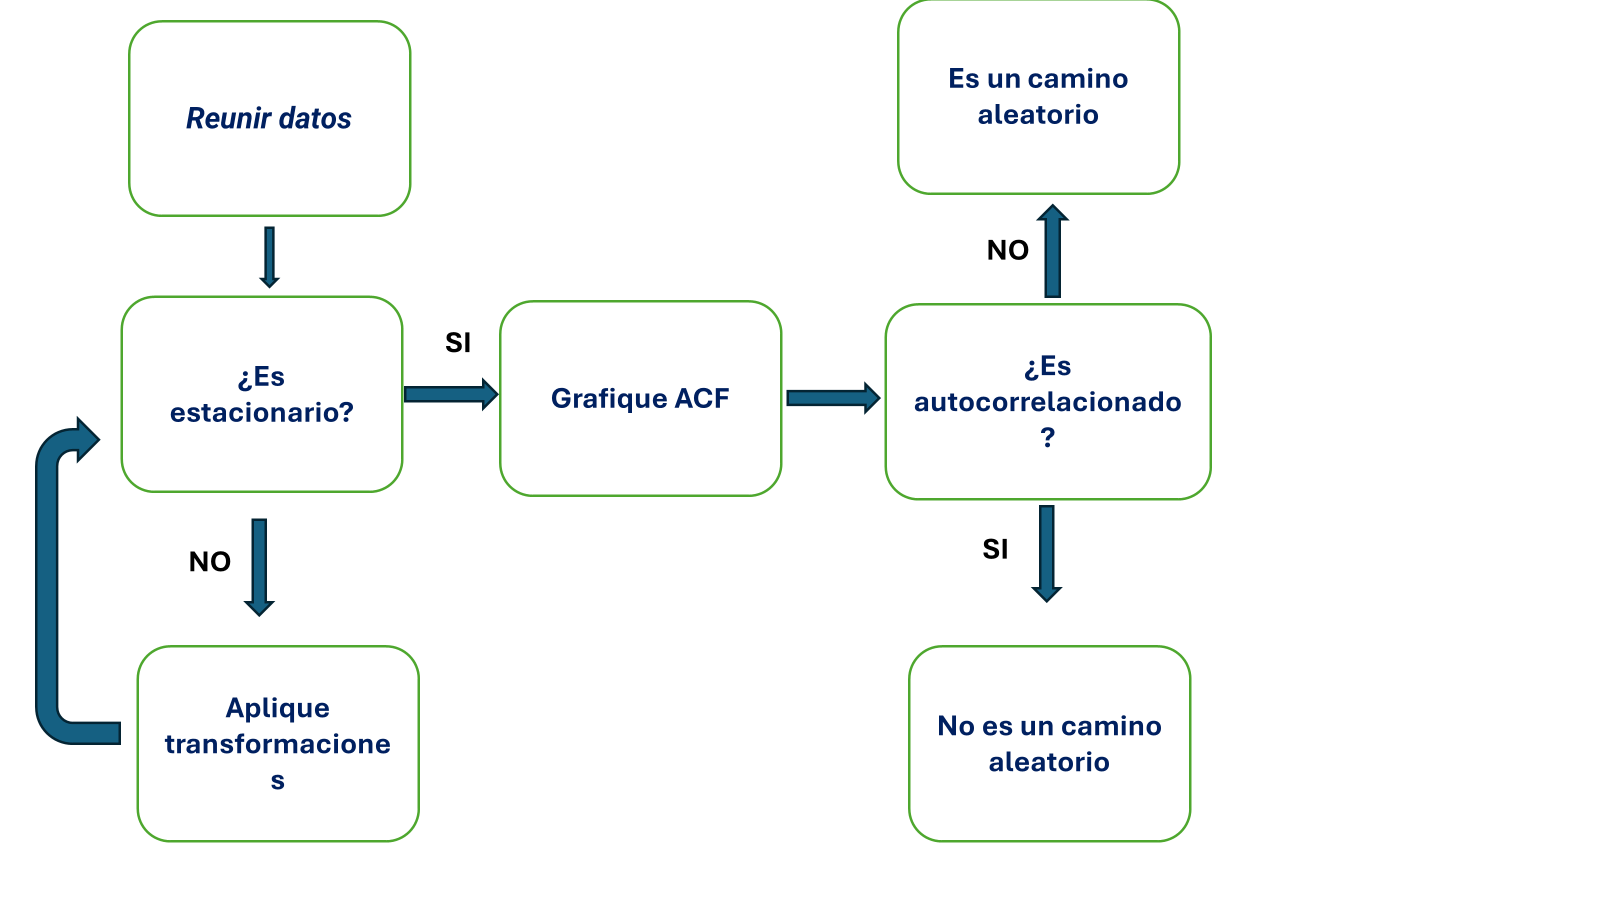

+ ***Un proceso estacionario es aquel cuyas propiedades estadísticas no cambian con el tiempo.***

## **3.2.1. Estacionariedad**
+ Por ahora, dado que todavía estamos en las primeras etapas del pronóstico de series de tiempo, centrémonos en las series de tiempo estacionarias, lo que significa que necesitaremos encontrar formas de transformar nuestras series de tiempo para hacerlas estacionarias.
+ Una transformación es simplemente una manipulación matemática de los datos para estabilizar su media y varianza, haciéndolos así estacionarios.
+ La transformación más simple que se puede aplicar es **la diferenciación**.
+ *Esta transformación ayuda a estabilizar la media, lo que a su vez elimina o reduce los efectos de tendencia y estacionalidad.*
+ ***Diferenciar es calcular la serie de cambios de un paso de tiempo a otro.**
+ ***Para lograr eso, simplemente restamos el valor del paso de tiempo anterior $y_{t-1}$ del valor en el presente $y_t$ para obtener el valor diferenciado $y'_t$ .

+ **Ecuación 3.7** $$y'_t=y_t-y_{t-1}$$

## **Transformación - Estacionariedad**
+ ***La diferenciación es una transformación que calcula el cambio de un paso de tiempo a otro.***
+ *Esta transformación es útil para estabilizar la media.*

+ Aplicar una ***función logarítmica*** a la serie puede estabilizar su *varianza*.

+ Podemos visualizar el proceso de diferenciación en la figura 3.5. Notamos como hacer la diferencia nos hace perder un dato, porque en el momento inicial no podemos tomar la diferencia con su paso anterior, ya que $t= -1$ no existe.

+ **Figura 3.5 Visualizando la transformación diferenciadora. Aquí se aplica una diferenciación de primer orden. Observe cómo perdemos un punto de datos después de esta transformación porque el punto inicial en el tiempo no se puede diferenciar de los valores anteriores ya que no existe.**


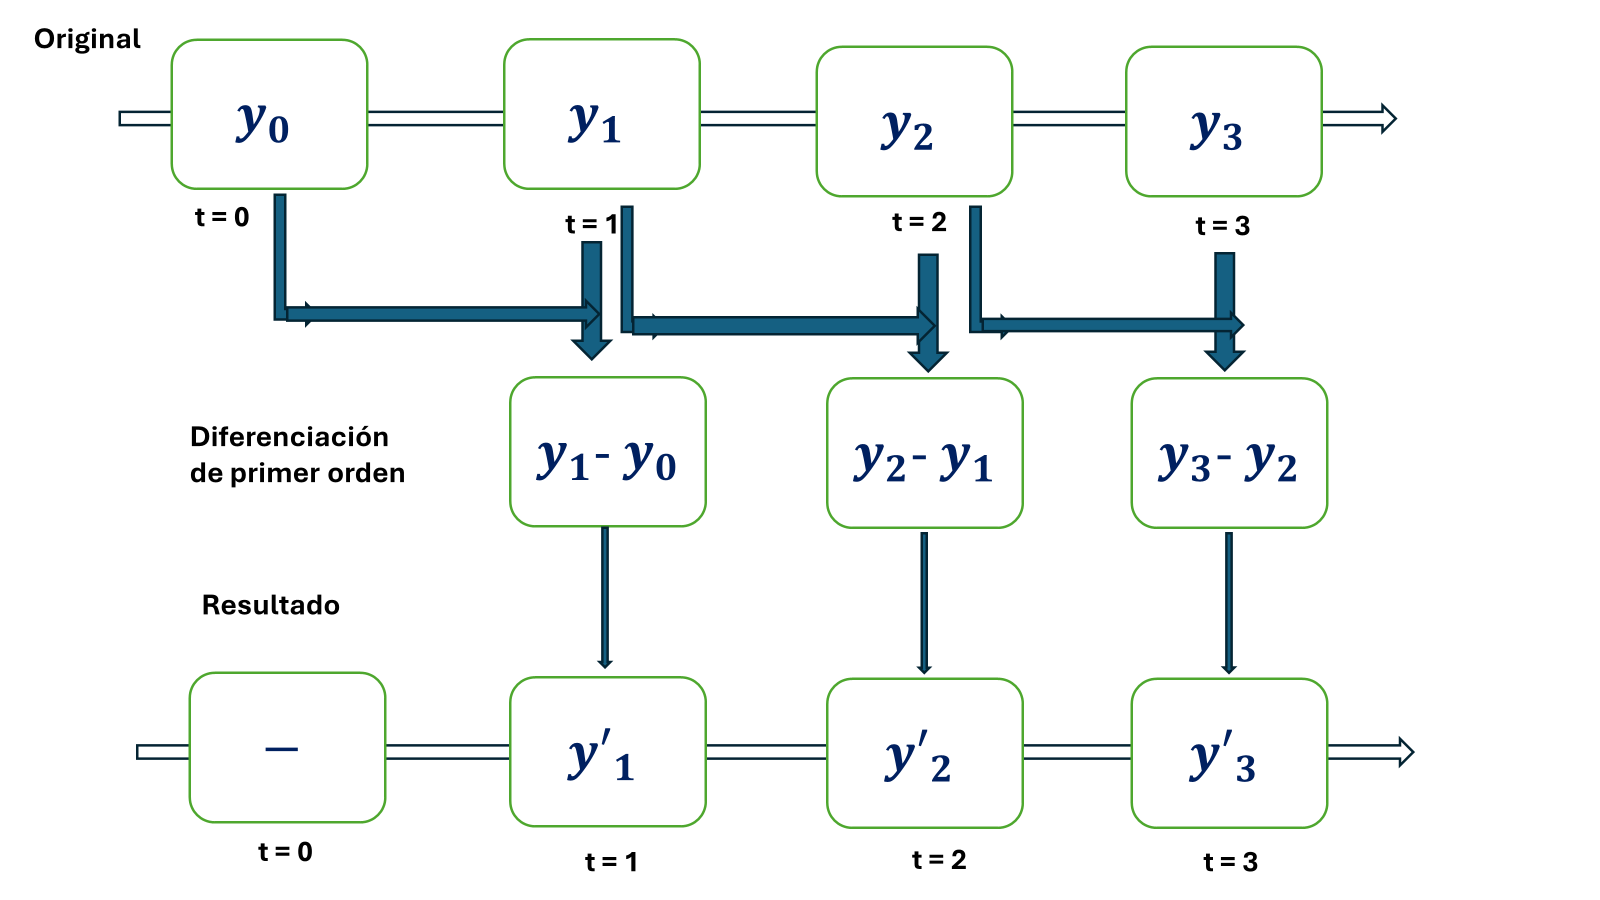

+ **Ecuación 3.7** $$y'_t=y_t-y_{t-1}$$

## **Transformación en la previsión de series temporales**
+ Tenga en cuenta que cuando modelamos una serie de tiempo que fue transformada, debemos destransformarla para devolver los resultados del modelo a las unidades de medida originales.
+ Por lo tanto, si aplica una transformación logarítmica a sus datos, asegúrese de aumentar los valores de pronóstico a la potencia de 10, para que los valores vuelvan a su magnitud original.
+ De esa manera, nuestras predicciones tendrán sentido en su contexto original.

+ Ahora que sabemos qué tipo de transformaciones aplicar en una serie de tiempo para hacerla estacionaria, necesitamos encontrar una manera de probar si una serie es estacionaria o no.

## **Pruebas de estacionariedad**
+ Una vez que se aplica una transformación, debemos probar la estacionariedad para determinar si debemos aplicar otra transformación para hacer que una serie de tiempo sea estacionaria, o si necesitamos transformarla.
+ ***Una prueba común de aplicar es la prueba Dickey-Fuller aumentada (ADF)***.

+ **Figura 3.5 Visualizando la transformación diferenciadora. Aquí se aplica una diferenciación de primer orden. Observe cómo perdemos un punto de datos después de esta transformación porque el punto inicial en el tiempo no se puede diferenciar de los valores anteriores ya que no existen.**

## **Prueba Dickey-Fuller aumentada (ADF)**

+ **La prueba de Dickey-Fuller aumentada, o prueba ADF**, *nos ayuda a determinar si una serie de tiempo es estacionaria al probar la presencia de una raíz unitaria. Si hay una raíz unitaria, nuestra serie temporal no es estacionaria.*

+ ***La hipótesis nula establece que existe una raíz unitaria, lo que significa que nuestra serie de tiempo no es estacionaria.***

+ Consideremos por qué no se desea la presencia de una raíz unitaria al realizar pronósticos y por qué significa que nuestra serie de tiempo no es estacionaria.
+ *Si modelamos una serie de tiempo muy simple donde el valor presente $y_t$ solo depende de su valor pasado $y_{t-1}$ sujeto a un coeficiente $α_1$ , una $C$ constante y ruido blanco $ϵ_t$ , entonces podemos escribir la siguiente expresión general:
  
+ **Ecuación 3.8**
$$y_t = C + α_1y_{t-1}+ϵ_t$$



# **3.2.2 Pruebas de estacionariedad**
+ De la ecuación 3.8 recordamos que $ϵ_t$ representa algún error que no podemos predecir y $C$ es una constante. Aquí, $α_1$ es la raíz de la serie temporal.
+ Esta **serie temporal será estacionaria sólo si la raíz se encuentra dentro del círculo unitario**.
+ Por lo tanto, su valor debe estar entre -1 y 1.
+ Esto tiene sentido, porque si ocurre un shock inesperado en la serie, lo que significa que de repente se agrega una $C$ grande a $y_{t-1}$, eventualmente volverá a su media, y sabemos que una media constante a lo largo del tiempo es un indicador de estacionariedad.
+ Sin embargo, si tenemos una raíz unitaria, lo que significa que $α_1 = 1$, entonces el efecto del shock será permanente en la serie temporal y su media entonces cambiará.
+ **Por tanto, como la media no es constante en el tiempo, la serie no es estacionaria.**

+ **Podemos entender mejor este efecto en la figura 3.6. Aquí hemos simulado un proceso estacionario y uno no estacionario en 400 pasos de tiempo. En el paso 100, provocamos un shock en la serie. Como puede ver, el proceso estacionario vuelve rápidamente a su valor medio (mostrado por la línea discontinua), amortiguando efectivamente el efecto del choque. Sin embargo, el proceso no estacionario se ve afectado permanentemente por el shock, ya que vemos que aumenta después del paso 100, por lo que su media durante los últimos 300 pasos también ha aumentado (como lo muestra la línea de puntos).**

+ ***Figura 3.6 Series de tiempo estacionarias y no estacionarias simuladas en 400 pasos de tiempo. Puedes ver que la serie estacionaria no aumenta ni disminuye a largo plazo. Sin embargo, el proceso no estacionario tiene largos períodos de tendencias positivas y negativas.***

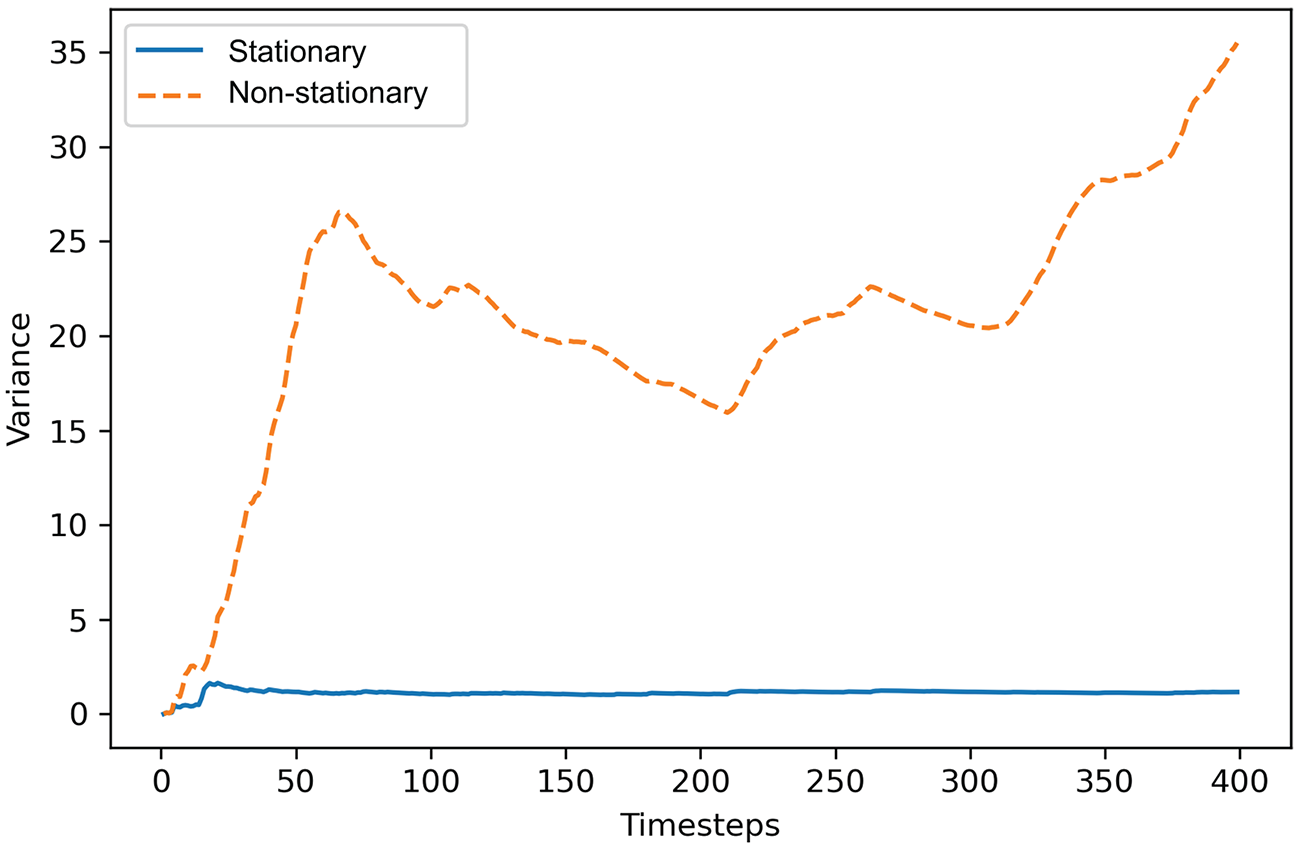


## **Sobre la prueba Dickey-Fuller aumentada (ADF)**


+ **Ecuación 3.8 - ADF**
$$y_t = C + α_1y_{t-1}+ϵ_t$$


+ **Ecuación 3.9**
$$y_t = 0,5y_{t –1} + ϵ_t$$

+ **Ecuación 3.10**
$$y_t = y_{t –1} + ϵ_t$$

+ Date cuenta de que si la constante es $C=0$ y tenemos una raíz unitaria $α_1=1$, entonces **obtenemos la ecuación de un paseo aleatorio y podemos concluir que un paseo aleatorio no es un proceso estacionario**.

+ ***Ahora que sabemos cómo transformar una serie de tiempo para hacerla estacionaria y usar una prueba estadística para asegurarnos de que sea estacionaria, podemos trazar la función de autocorrelación para determinar qué tipo de proceso está en juego.***

## **La función de autocorrelación**
+ **Sabemos que la correlación mide el alcance de una relación lineal entre dos variables.**
+ ***Por lo tanto, la autocorrelación mide la relación lineal entre valores rezagados de una serie de tiempo. Por tanto, la función de autocorrelación revela cómo cambia la correlación entre dos valores cualesquiera a medida que aumenta el retraso. Aquí, el retraso es simplemente el número de pasos de tiempo que separan dos valores.***

+ Por ejemplo, podemos calcular el coeficiente de autocorrelación entre $y_t$ e $y_{t-1}$ . En este caso, el retraso es igual a 1 y el coeficiente se denotaría como $r_1 = corr(y_t,y_{t-1})$.
+ De manera similar, podemos calcular la autocorrelación $r_2 = corr(y_t,y_{t-2})$.
+ Cuando trazamos la función **ACF**, el coeficiente es la variable dependiente, mientras que el rezago es la variable independiente.
+ Tenga en cuenta que el coeficiente de autocorrelación en el retraso 0 siempre será igual a 1, $r_0 = corr(y_t,y_{t})=1$.
+ Esto tiene sentido intuitivamente, porque la relación lineal entre una variable y ella misma en el mismo paso de tiempo debe ser perfecta y, por lo tanto, igual a 1.

+ *En presencia de una tendencia al trazar el **ACF**, los coeficientes serán altos para rezagos cortos y veremos una disminución lineal a medida que aumenta el rezago.*
+ ***Si los datos son estacionales, el gráfico _ACF_ también mostrará patrones cíclicos.***
+ Por lo tanto, trazar la **función ACF de un proceso no estacionario** no nos dará más información sobre lo que ya sabemos al observar la evolución de nuestro proceso a través del tiempo.
+ Sin embargo, **trazar el ACF para un proceso estacionario puede, por ejemplo, ayudarnos a identificar la presencia de un paseo aleatorio.**


### **cómo transformar una serie temporal para hacerla estacionaria**
+ Ahora que entendemos qué es la estacionariedad, cómo transformar una serie temporal para hacerla estacionaria, qué prueba estadística se puede utilizar para evaluar la estacionariedad y cómo trazar la función ACF nos ayudará a identificar la presencia de un paseo aleatorio, estamos listos para Reúna todos estos conceptos y aplíquelos en Python.
+ En esta sección, trabajaremos con nuestros datos simulados y cubriremos los pasos necesarios para identificar una caminata aleatoria.

+ **Figura 3.7 Media de procesos estacionarios y no estacionarios a lo largo del tiempo. Puede ver cómo la media del proceso estacionario se vuelve constante después de los primeros pasos. Por otro lado, la media del proceso no estacionario es una clara función del tiempo, ya que está en constante cambio.**

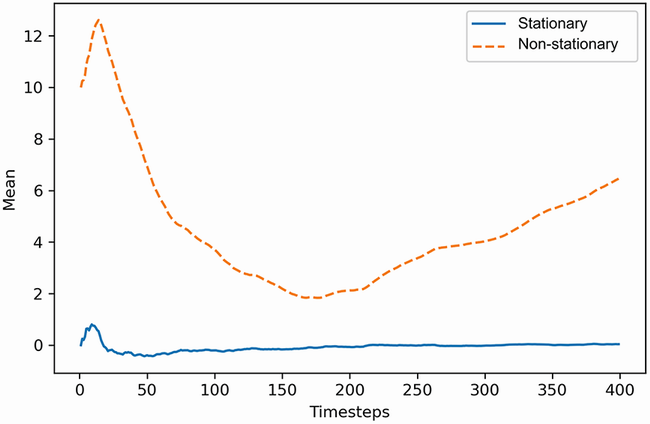

+ **Figura 3.8 Varianza de las series estacionarias y no estacionarias simuladas a lo largo del tiempo. La varianza del proceso estacionario es independiente del tiempo, ya que es constante después de los primeros pasos de tiempo. Para el proceso no estacionario, la varianza cambia con el tiempo, lo que significa que no es independiente.**

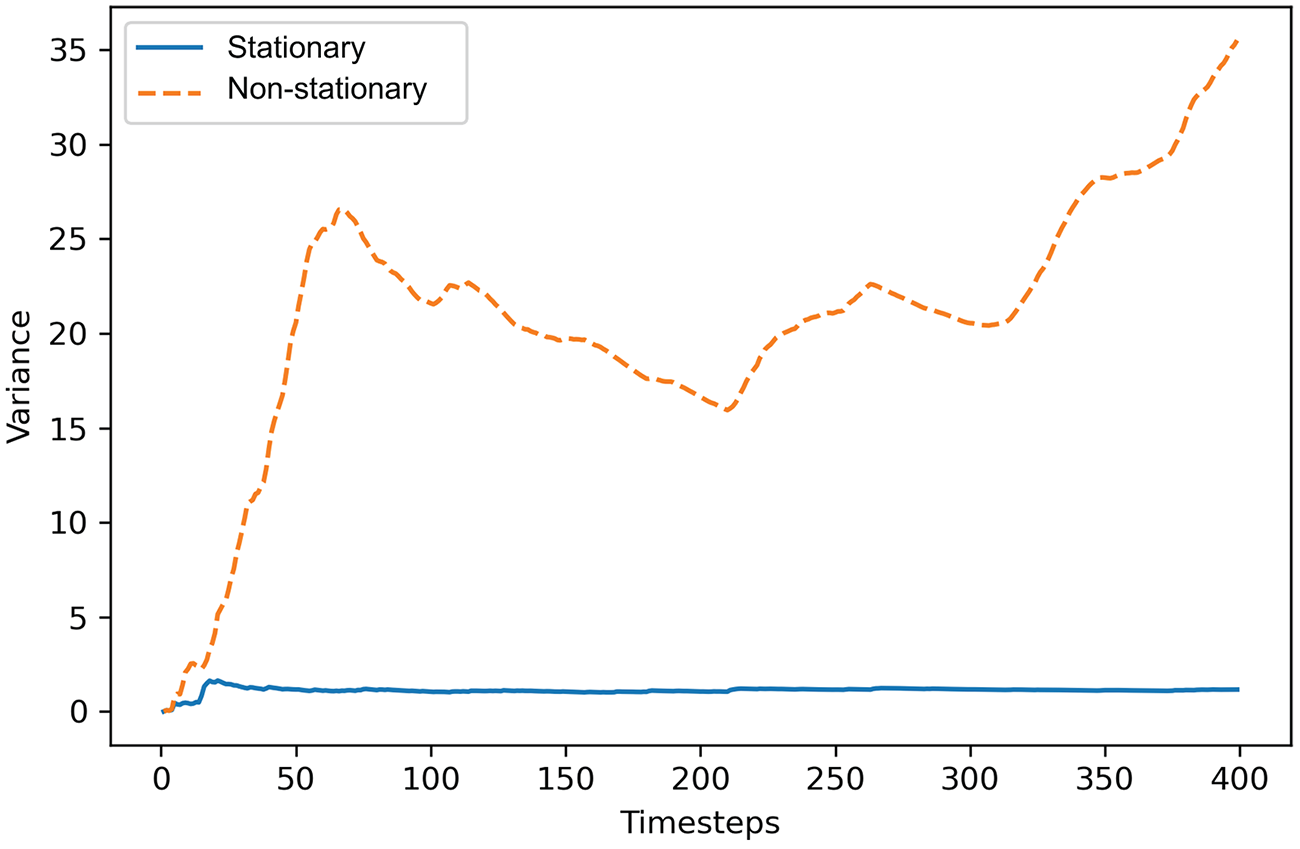

# **Continuando con nuestra simulación - Prueba ADF**

In [ ]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(random_walk) #A

print(f'ADF Statistic: {ADF_result[0]}')    #B
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.965952487691875
p-value: 0.7654789696692581


## **Que encontramos con la Prueba Dickey-Fuller aumentada (ADF)**

+ **La prueba de Dickey-Fuller aumentada, o prueba ADF**, *nos ayuda a determinar si una serie de tiempo es estacionaria al probar la presencia de una raíz unitaria. Si hay una raíz unitaria, nuestra serie temporal no es estacionaria.*

+ ***La hipótesis nula establece que existe una raíz unitaria, lo que significa que nuestra serie de tiempo no es estacionaria.***
+ Esto imprime una estadística ADF de -0,97 y un valor p de 0,77.
+ Claramente, el estadístico ADF no es un número negativo grande y con un valor p mayor que 0,05, no podemos rechazar la hipótesis nula que afirma que nuestra serie temporal no es estacionaria.
+ Podemos respaldar aún más nuestra conclusión trazando la función ACF.

# **Continuando con nuestra simulación - Correlograma**

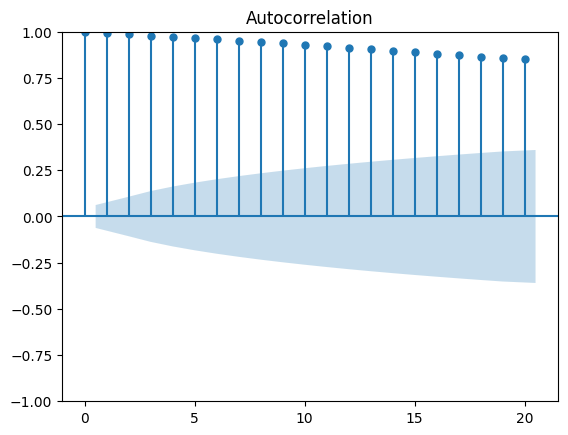

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(random_walk, lags=20);

+ **Figura 3.7 Gráfico de la función de autocorrelación de nuestro paseo aleatorio simulado. Observe cómo los coeficientes de autocorrelación disminuyen lentamente. Incluso con un retraso de 20, el valor todavía está autocorrelacionado, lo que significa que nuestro paseo aleatorio no es estacionario en este momento.**

+ **Si observamos la figura 3.7, observamos cómo los coeficientes de autocorrelación disminuyen lentamente a medida que aumenta el retraso, lo que es un claro indicador de que nuestro paseo aleatorio no es un proceso estacionario. Tenga en cuenta que el área sombreada representa un intervalo de confianza. Si un punto está dentro del área sombreada, entonces no es significativamente diferente de 0. De lo contrario, el coeficiente de autocorrelación es significativo.**

# **3.2.3 La función de autocorrelación -  método _diff_**
+ Para diferenciar, usaremos el numpy método diff.
+ Esto diferenciará una determinada matriz de datos.
+ El $n$ parámetro controla cuántas veces se debe diferenciar la matriz.
+ En este caso, aplicamos una diferenciación de primer orden, por lo que el nparámetro se establece en 1:

# **Continuando con nuestra simulación - Realizando la Transformación**

In [ ]:
diff_random_walk = np.diff(random_walk, n=1)
ADF_result = adfuller(diff_random_walk) #A

print(f'Estadística ADF: {ADF_result[0]}')
print(f'valor-p: {ADF_result[1]}')

Estadística ADF: -31.789310857560594
valor-p: 0.0


# **Continuando con nuestra simulación - Ahora el proceso si es estacionario**

+ Esto imprime una estadística ADF de -31,79 con un valor p de 0.
+ Aquí, la estadística ADF es un número negativo grande y el valor p es inferior a 0,05.
+ Por lo tanto, rechazamos la hipótesis nula y podemos decir que este proceso no tiene raíz unitaria y, por tanto, es estacionario.

+ **Figura 3.8 Evolución de nuestro paseo aleatorio diferenciado. Parece que eliminamos con éxito la tendencia y que la varianza es estable.**
+ De la figura 3.8, parece que eliminamos con éxito la tendencia de nuestra serie. Además, la variación parece bastante estable. Probemos nuevamente la estacionariedad usando la prueba ADF

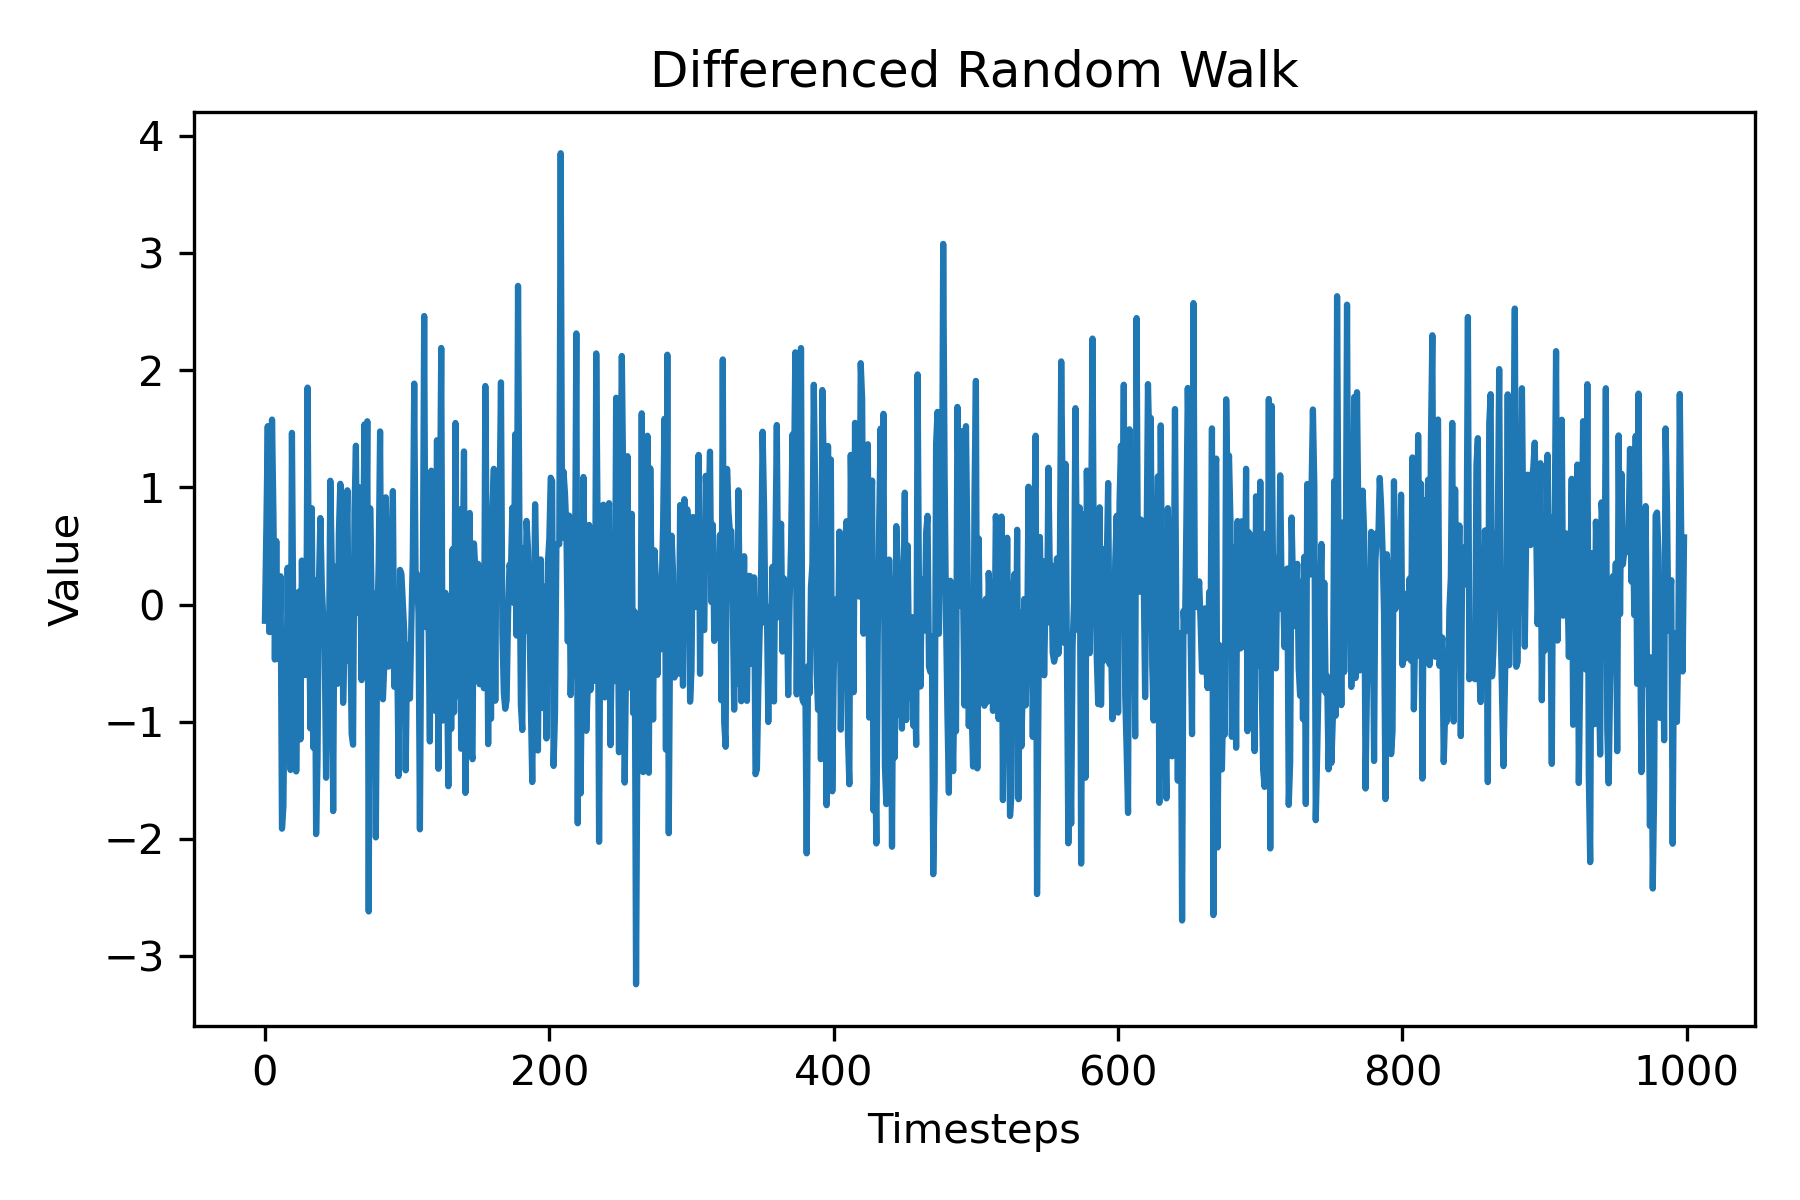

# **3.2.4 Poniéndolo todo junto**
+ **Figura 3.9 Gráfico ACF de nuestro paseo aleatorio diferenciado. Observe cómo no hay coeficientes significativos después del retraso 0. Este es un indicador claro de que estamos ante un paseo aleatorio.**

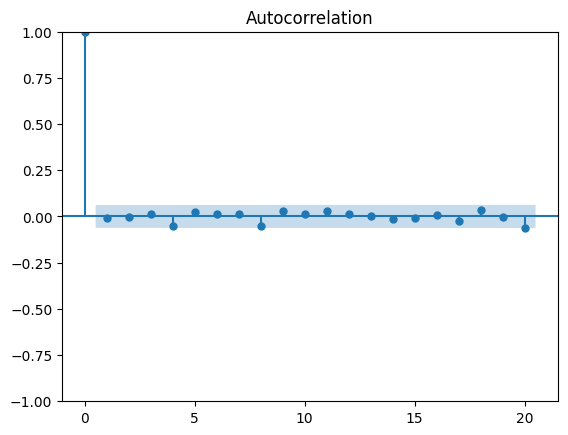

In [ ]:
plot_acf(diff_random_walk, lags=20);

In [ ]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.965952487691875
p-value: 0.7654789696692581


### **Caminata aleatoria**
+ Un paseo aleatorio es una serie cuya primera diferencia es estacionaria y no está correlacionada.
+ **Figura 3.9 Gráfico del ACF de nuestro paseo aleatorio simulado. Observe cómo los coeficientes de autocorrelación disminuyen lentamente. Incluso con un retraso de 20, el valor todavía está autocorrelacionado, lo que significa que nuestro paseo aleatorio no es estacionario en este momento.**

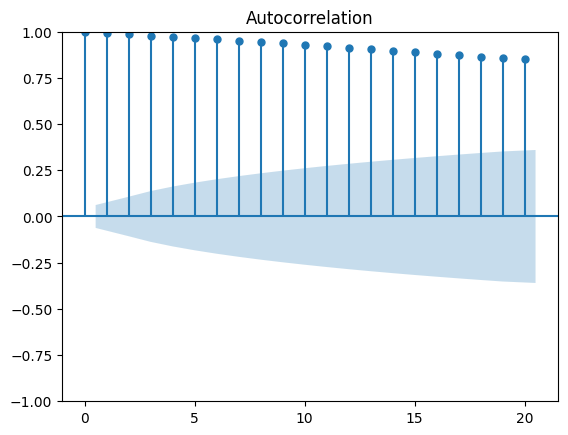

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(random_walk, lags=20);

# **3.2.5 ¿GOOGL es un paseo aleatorio?**
+ Ahora que aplicamos los pasos necesarios para identificar un paseo aleatorio en nuestros datos simulados, este es un buen momento para probar nuestros conocimientos y nuevas habilidades en nuestro conjunto de datos de la vida real.
+ Tomando el precio de cierre de GOOGL entre el 28 de abril de 2020 y el 27 de abril de 2021 de Finance.yahoo.com , determinemos si el proceso se puede aproximar como un paseo aleatorio o no.

### **Pronosticar el precio de cierre diario de GOOGL**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
df = pd.read_csv('/content/googl.csv')
df.head()

In [ ]:
df = pd.read_csv('/content/googl.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


+ Ahora que sabemos qué es un paseo aleatorio y cómo identificarlo, estamos listos para comenzar a realizar pronósticos.
+ Esto podría resultar sorprendente, ya que establecimos que un paseo aleatorio toma pasos aleatorios a medida que avanza el tiempo.
+ Por supuesto, predecir un cambio aleatorio es imposible, a menos que predigamos un valor aleatorio nosotros mismos, lo cual no es ideal.

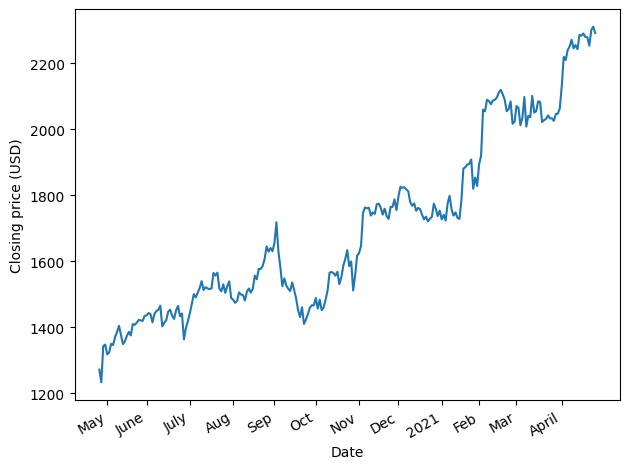

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235],
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 2021, 'Feb',
 'Mar', 'April'])

fig.autofmt_xdate()
plt.tight_layout()

**Figura 3.12 Precio de cierre del GOOGL del 27 de abril de 2020 al 27 de abril de 2021**
+ **Si observamos la figura 3.12, podemos ver una tendencia en los datos, ya que el precio de cierre aumenta con el tiempo; por lo tanto, no tenemos un proceso estacionario. Esto se ve respaldado por la prueba ADF:**

##**Previsión a largo plazo - - Prueba ADF**

In [ ]:
GOOGL_ADF_result = adfuller(df['Close'])

print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')

ADF Statistic: 0.16025048664771302
p-value: 0.9699419435913057


+ **Esto devuelve una estadística ADF de 0,16 y un valor p mayor que 0,05, por lo que sabemos que nuestros datos no son estacionarios.**
+ **Por lo tanto, diferenciaremos nuestros datos para ver si eso los hace
estacionarios**

In [ ]:
diff_close = np.diff(df['Close'], n=1)

**A continuación, podemos ejecutar la prueba ADF en los datos diferenciados:**

In [ ]:
GOOGL_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {GOOGL_diff_ADF_result[0]}')
print(f'p-value: {GOOGL_diff_ADF_result[1]}')

ADF Statistic: -5.303439704295234
p-value: 5.3865309614545585e-06


+ **Esto da como resultado una estadística ADF de -5,3 y un valor p menor que 0,05, lo que significa que tenemos un proceso estacionario.**
+ Ahora podemos trazar la función ACF y ver si hay autocorrelación:

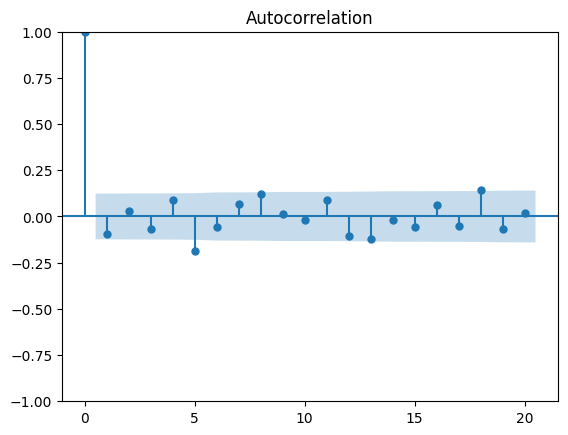

In [ ]:
plot_acf(diff_close, lags=20);

**Figura 3.13 Podemos ver que no hay coeficientes significativos en el gráfico ACF. Es posible que observe que en los rezagos 5 y 18 los coeficientes son significativos, mientras que los demás no lo son. Esto sucede por casualidad con algunos datos, y se puede suponer que estos puntos no son significativos, porque no tenemos coeficientes significativos consecutivos entre los rezagos 0 y 5 o entre los rezagos 0 y 18.**

## **Conclusiones válidas**
+ La figura 3.13 puede hacer que te rasques la cabeza y te preguntes si hay autocorrelación o no.
+ No vemos ningún coeficiente significativo, excepto en los rezagos 5 y 18.
+ Esta situación puede surgir a veces y se debe solo al azar.
+ En tal situación, podemos asumir con seguridad que los coeficientes en los rezagos 5 y 18 no son significativos, porque no tenemos coeficientes significativos consecutivos.
+ Simplemente sucedió por casualidad que los valores diferenciados están ligeramente correlacionados con los de los rezagos 5 y 18.
+ Por lo tanto, podemos concluir que el precio de cierre de GOOGL se puede aproximar mediante un proceso de recorrido aleatorio.
+ **Si tomamos la primera diferencia, la serie se vuelve estacionaria y su gráfico de ACF no muestra autocorrelación, lo que significa que es puramente aleatorio.**

# **3.3 Pronosticando una caminata aleatoria**

+ Como se mencionó, solo podemos usar **métodos de pronóstico ingenuos para esta situación**, ya que estamos tratando con un paseo aleatorio.
+ En este caso utilizaremos **la media histórica, el último valor conocido y el método de la deriva**.
+ Pronosticar la media es bastante sencillo. Simplemente calcule la media del conjunto de entrenamiento y diremos que los próximos 200 pasos de tiempo serán iguales a ese valor.
+ Aquí, crearemos uno DataFrameque contendrá los valores reales observados, así como nuestras predicciones desde las líneas de base.
+ Para hacerlo, asignaremos una copia del conjunto de prueba a un DataFramearchivo pred_df.
+ De esa manera, tenemos los valores observados. Luego, podemos asignar nuestra predicción de la media histórica a la columna pred_mean .

## **Conserva los últimos cinco días para probar tus pronósticos**

+ **Para facilitar las cosas, asignaremos la caminata aleatoria a DataFrame y dividiremos el conjunto de datos en un conjunto de entrenamiento y de prueba. El conjunto de entrenamiento contendrá los primeros 800 pasos de tiempo, lo que corresponde al 80% de los datos simulados. Por tanto, el conjunto de prueba contendrá los últimos 200 valores:**

In [ ]:
import pandas as pd
df = pd.DataFrame({'value': random_walk}) # Asignar el último 20% de los valores hasta el índice 800. paseo aleatorio simulado al conjunto de prueba
train = df[:800]
test = df[800:]

In [ ]:
test

,value
800,-5.876664
801,-6.392708
802,-6.296588
803,-6.758863
804,-7.193359
...,...
995,16.395408
996,18.193095
997,18.833938
998,18.262759


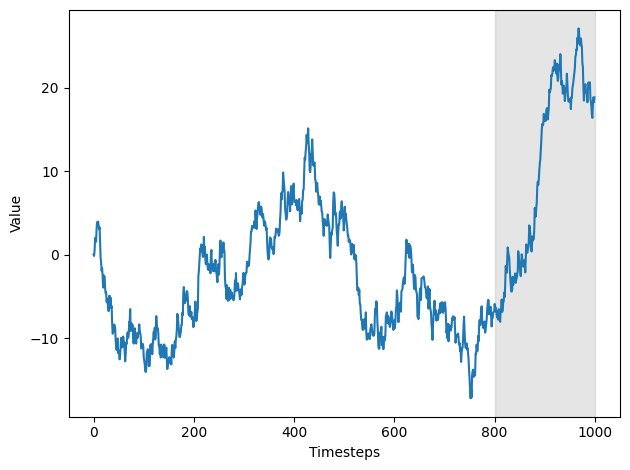

In [ ]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.axvspan(800, 1000, color='#808080', alpha=0.2)

plt.tight_layout()
plt.savefig('figures', dpi=300)

+ **Figura 3.14 División de entrenamiento/prueba de nuestro recorrido aleatorio generado. Los primeros 800 pasos de tiempo son parte del conjunto de entrenamiento y los valores restantes son parte del conjunto de prueba. Nuestro objetivo es pronosticar los valores en el área sombreada.**

## **La predicción de la media - Método ingenuo**
+ La predicción de la media es bastante sencilla. Simplemente calcularemos la media del conjunto de entrenamiento y diremos que los próximos 200 pasos de tiempo serán iguales a ese valor.
+ Aquí, crearemos una nueva columna pred_mean que contendrá la media histórica como predicción:

In [ ]:
# Forecast the historical mean
mean = np.mean(train['value']) # Calcular la media del conjunto de trenes.
test.loc[:, 'pred_mean'] = mean # Predecir la media histórica para los próximos 200 pasos de tiempo.
mean

-3.6772058069098805

In [ ]:
test.head() # Muestra las primeras cinco filas de prueba.

,value,pred_mean
800,-5.876664,-3.677206
801,-6.392708,-3.677206
802,-6.296588,-3.677206
803,-6.758863,-3.677206
804,-7.193359,-3.677206


+ **Obtendrá una media histórica de -3,68. Esto significa que pronosticamos que el valor para los próximos 200 pasos de nuestro paseo aleatorio simulado será igual a -3,68.**

## **La predicción del último valor - Método ingenuo**
+ **Otra posible línea de base es predecir el último valor conocido del conjunto de entrenamiento. Aquí, simplemente extraeremos el último valor del conjunto de entrenamiento y asignaremos su valor como nuestra predicción para los próximos 200 pasos de tiempo:**

In [ ]:
last_value = train.iloc[-1].value # Recupera el último valor del conjunto de trenes.
test.loc[:, 'pred_last'] = last_value # Asigne el último valor como predicción para los próximos 200 pasos de tiempo en la columna pred_last.
test.head()

,value,pred_mean,pred_last
800,-5.876664,-3.677206,-6.814947
801,-6.392708,-3.677206,-6.814947
802,-6.296588,-3.677206,-6.814947
803,-6.758863,-3.677206,-6.814947
804,-7.193359,-3.677206,-6.814947


+ **Este método produce pronósticos con un valor constante de -6,81.**

# **3.3 Previsión de un paseo aleatorio - Método de la Deriva**
+ Finalmente, aplicamos el método de deriva, que aún no hemos cubierto.
+ **El método de deriva es una modificación de la predicción del último valor conocido.**
+ Aquí, permitimos que los valores aumenten o disminuyan con el tiempo.
+ La velocidad a la que los valores cambiarán en el futuro es igual a la observada en el conjunto de entrenamiento.
+ Por lo tanto, equivale a calcular la pendiente entre el primer y el último valor del conjunto de entrenamiento y simplemente extrapolar esta línea recta al futuro.

+ Recuerda que podemos calcular la pendiente de una línea recta dividiendo el cambio en el eje y por el cambio en el eje x.
+ En nuestro caso, el cambio en el eje y es la diferencia entre el último valor de nuestro paseo aleatorio $y_f$ y su valor inicial $y_i$ .
+ Entonces, el cambio en el eje x es equivalente al número de pasos de tiempo, como se muestra en la ecuación 3.9.

+ **Ecuación 3.11**

$$slope=\frac{\Delta y}{\Delta x}=\frac{y_{f}-y_{i}}{\#times\_steps-1}$$


## **3.3.1 Forecasting on a long horizon**
+ Calculamos el último valor del conjunto de trenes cuando implementamos la última línea base de valor conocido, y sabemos que el valor inicial de nuestra caminata aleatoria simulada es 0; por lo tanto, podemos introducir los números en la ecuación 3.11 y calcular la deriva en la ecuación 3.12.
+ **Ecuación 3.12**
$$drift=\frac{-6.81-0}{800-1}=-0.0085$$

+ Implementemos esto en Python ahora. También calcularemos el cambio en el eje x y el eje y, y simplemente los dividiremos para obtener la deriva:
+ Como era de esperar, esto nos da una deriva de -0,0085, lo que significa que los valores de nuestros pronósticos disminuirán lentamente con el tiempo.
+ El método de la deriva simplemente establece que el valor de nuestro pronóstico depende linealmente del paso de tiempo, el valor de la deriva y el valor inicial de nuestro paseo aleatorio como se expresa en la ecuación 3.11.
+ Tenga en cuenta que nuestro paseo aleatorio comienza en 0, por lo que podemos eliminarlo de la ecuación 3.11.



In [ ]:
deltaX = 800 - 1 # Calcular el cambio en el eje x, que es la diferencia entre el último índice (799) y el primer índice (0).
# Es equivalente al número de pasos de tiempo menos 1.
deltaY = last_value - 0
drift = deltaY / deltaX
print(drift)

-0.008529346056640632


+ Como queremos pronosticar los próximos 200 pasos de tiempo después del conjunto de entrenamiento, primero creamos una matriz que contiene el rango de pasos de tiempo que comienza en 800 y termina en 1000 con un paso de 1.
+ Luego simplemente multiplicamos cada paso de tiempo por la deriva para obtener nuestro pronóstico. valores. Finalmente, los asignamos a la columna pred_driftpred_df de .

In [ ]:
x_vals = np.arange(801, 1001, 1)
pred_drift = drift * x_vals
test.loc[:, 'pred_drift'] = pred_drift
test.head()

,value,pred_mean,pred_last,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.832006
801,-6.392708,-3.677206,-6.814947,-6.840536
802,-6.296588,-3.677206,-6.814947,-6.849065
803,-6.758863,-3.677206,-6.814947,-6.857594
804,-7.193359,-3.677206,-6.814947,-6.866124


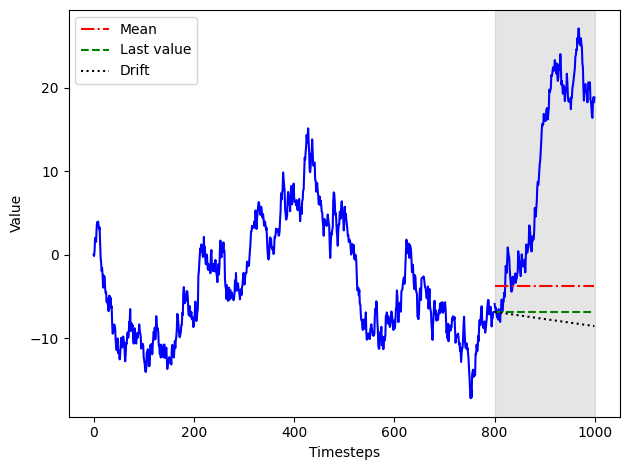

In [ ]:
fig, ax = plt.subplots()

ax.plot(train.value, 'b-') # Grafique los valores en el conjunto de train.
ax.plot(test['value'], 'b-') # Grafique los valores observados en el conjunto de prueba.
ax.plot(test['pred_mean'], 'r-.', label='Mean') # Grafique el pronóstico a partir de la media histórica. Será una línea roja discontinua y punteada.
ax.plot(test['pred_last'], 'g--', label='Last value') # Grafique el pronóstico a partir del último valor del conjunto de datos. Será una línea discontinua verde.
ax.plot(test['pred_drift'], 'k:', label='Drift') # Dibuje el pronóstico utilizando el método de deriva. Será una línea punteada negra.

ax.axvspan(800, 1000, color='#808080', alpha=0.2) # Horizonte de pronóstico de sombra.
ax.legend(loc=2) # Coloque la leyenda en la esquina superior izquierda.

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.savefig('figures', dpi=300)

+ **Figura 3.15 Pronóstico de nuestro paseo aleatorio utilizando la media, el último valor conocido y el método de deriva. Como puede ver, todas las predicciones son bastante pobres y no logran predecir el aumento repentino observado en el conjunto de prueba.**

# **MSE, ya que puede medir la calidad del ajuste de un modelo**
+ Por lo tanto, optamos por el MSE, ya que puede medir la calidad del ajuste de un modelo, incluso si el valor observado es 0.
+ La sklearnbiblioteca tiene una mean_squared_errorfunción que simplemente necesita los valores observados y los valores predichos. Luego devolverá el MSE.

In [ ]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_drift = mean_squared_error(test['value'], test['pred_drift'])
print('El MSE  con los diferentes metodos ingenuos')
print(f'El Error MSE con la media historica es {mse_mean}')
print(f'El Error MSE con la media con la última observación es {mse_last}')
print(f'El Error MSE con la deriva es {mse_drift}')

El MSE  con los diferentes metodos ingenuos
El Error MSE con la media historica es 326.50277395297474
El Error MSE con la media con la última observación es 425.1726033055617
El Error MSE con la deriva es 466.2172769077409


# **Conlusiones sobre MSE, ya que puede medir la calidad del ajuste de un modelo**
+ Obtendrá un MSE de 327, 425 y 466 para los métodos de media histórica, último valor y deriva, respectivamente.
+ Podemos comparar los MSE para estas tres líneas base en la figura 3.16.
+ Como puede ver en la figura 3.16, el mejor pronóstico se obtuvo al predecir la media histórica, y sin embargo el MSE supera los 300.
+ Este es un valor extremadamente alto considerando que nuestro paseo aleatorio simulado no supera el valor de 30.
+ A esta altura, debería estar convencido de que pronosticar un paseo aleatorio en un horizonte largo no tiene sentido.
+ Dado que el valor futuro depende del valor pasado más un número aleatorio, la parte de aleatoriedad se magnifica en un horizonte largo donde se agregan muchos números aleatorios a lo largo de muchos pasos de tiempo.

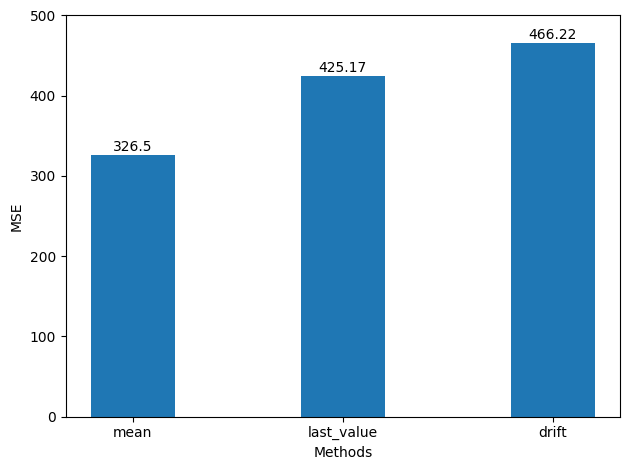

In [ ]:
fig, ax = plt.subplots()

x = ['mean', 'last_value', 'drift']
y = [mse_mean, mse_last, mse_drift]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 500)

for index, value in enumerate(y):
    plt.text(x=index, y=value+5, s=str(round(value, 2)), ha='center')

plt.tight_layout()

plt.savefig('figures', dpi=300)

+ **Figura 3.16 MSE de nuestras previsiones. Claramente, el futuro de un paseo aleatorio es impredecible, ya que las MyPE superan las 300.**

# **3.3.2 Pronosticar el siguiente paso de tiempo**
+ Pronosticar el siguiente paso de tiempo de un paseo aleatorio es la única situación razonable que podemos abordar, aunque seguiremos utilizando métodos de pronóstico ingenuos.
+ En concreto, predeciremos el último valor conocido.
+ Sin embargo, haremos este pronóstico solo para el siguiente paso de tiempo.
+ De esa manera, nuestro pronóstico solo debería tener un error de un número aleatorio, ya que el valor futuro de un paseo aleatorio es siempre el valor pasado más ruido blanco.
+ La implementación de este método es sencilla: tomamos nuestro valor observado inicial y lo usamos para predecir el siguiente paso de tiempo.
+ Una vez que registramos un nuevo valor, se utilizará como pronóstico para el siguiente paso de tiempo. Este proceso se repite luego en el futuro.
+ **Figura 3.17 Predicción del siguiente paso de tiempo de una caminata aleatoria. Aquí, el valor observado en un momento determinado se utilizará como pronóstico para el siguiente momento.**

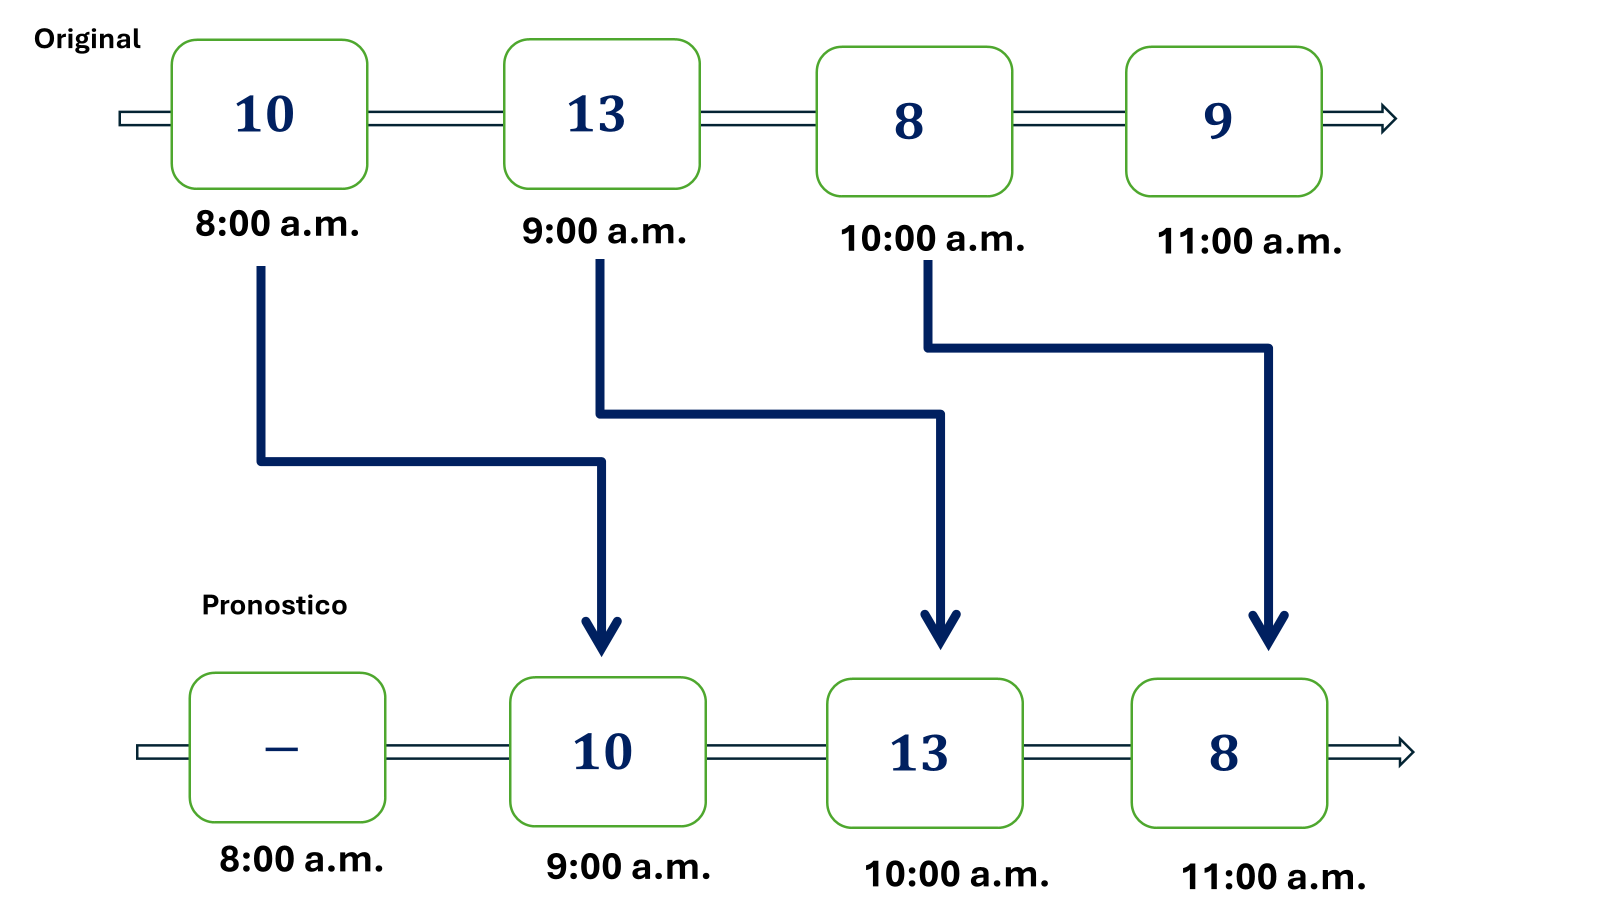

+ Apliquemos este método a nuestro proceso de recorrido aleatorio.
+ Para ilustrar este método, lo aplicaremos a todo el recorrido aleatorio.
+ Este pronóstico ingenuo puede parecer engañosamente sorprendente, cuando en realidad solo estamos prediciendo el último valor conocido en cada paso de tiempo.
+ Una buena forma de simular este proceso es desplazando nuestros datos, y la biblioteca pandas tiene un método shift que hace exactamente lo que queremos.
+ Simplemente pasamos la cantidad de períodos, que en nuestro caso es 1, ya que estamos pronosticando el siguiente paso de tiempo:

In [ ]:
df_shift = df.shift(periods=1) # df_shift es ahora nuestro pronóstico para todo el recorrido aleatorio y corresponde al último valor conocido en cada paso de tiempo.

df_shift.head()

,value
0,NaN
1,0.000000
2,-0.138264
3,0.509424
4,2.032454


+ Notarás que en el paso 1, el valor es 0, que corresponde al valor observado en el paso 0 en el recorrido aleatorio simulado.
+ Por lo tanto, estamos utilizando efectivamente el valor observado actual como pronóstico para el siguiente paso de tiempo.
+ Al representar gráficamente nuestro pronóstico, obtenemos la figura 3.18.

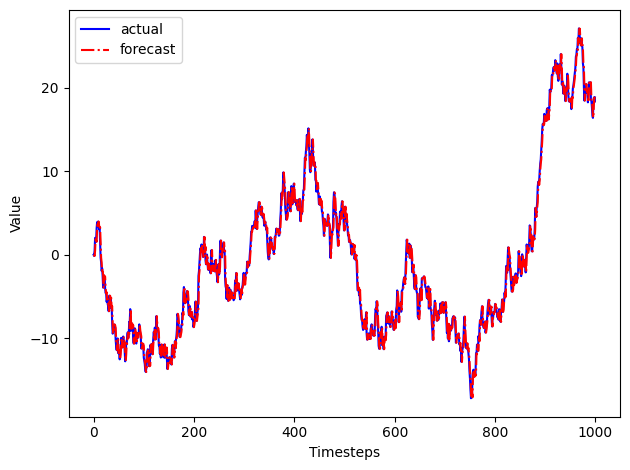

In [ ]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

plt.savefig('figures', dpi=300)

+ **Figura 3.18 Un pronóstico ingenuo del siguiente paso temporal de una caminata aleatoria. Este gráfico da la ilusión de un modelo muy bueno, cuando en realidad solo estamos prediciendo el valor observado en el paso de tiempo anterior.**

+ **Si observamos la figura 3.18, podríamos pensar que hemos desarrollado un modelo sorprendente que se ajusta casi a la perfección a nuestros datos. Parece que no tenemos dos líneas separadas en el gráfico, ya que ambas se superponen casi a la perfección, lo que es un signo de un ajuste perfecto. Ahora podemos calcular el MSE:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose, STL
mse_one_step = mean_squared_error(test['value'], df_shift[800:])
print(mse_one_step)

0.9256876651440581


+ Esto arroja un valor de 0,93, lo que nuevamente podría llevarnos a pensar que tenemos un modelo muy eficiente, ya que el MSE está muy cerca de 0.
+ Sin embargo, sabemos que simplemente estamos pronosticando el valor observado en el paso de tiempo anterior.
+ Esto se vuelve más evidente si ampliamos nuestro gráfico, como se muestra en la figura 3.19.
+ Por lo tanto, si se debe pronosticar un proceso de caminata aleatoria, es mejor hacer muchos pronósticos a corto plazo.
+ De esa manera, no permitimos que se acumulen muchos números aleatorios con el tiempo, lo que degradará la calidad de nuestros pronósticos a largo plazo.
+ Debido a que un proceso aleatorio da pasos aleatorios hacia el futuro, no podemos usar técnicas estadísticas o de aprendizaje profundo para ajustar dicho proceso: no hay nada que aprender de la aleatoriedad y no se puede predecir.
+ **En cambio, debemos confiar en métodos de pronóstico ingenuos**.

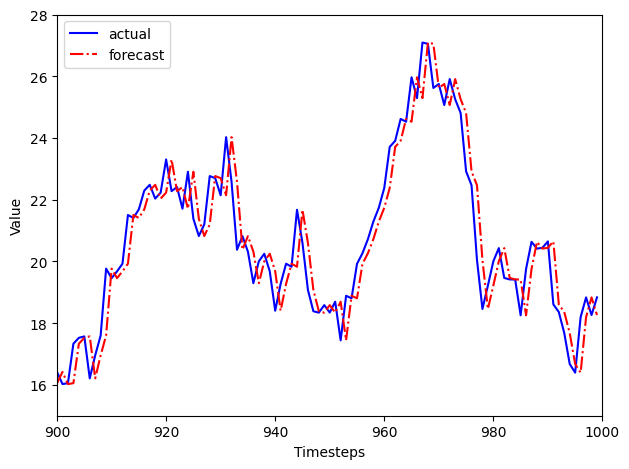

In [ ]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlim(900, 1000)
ax.set_ylim(15, 28)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

plt.savefig('figures', dpi=300)

+ **Figura 3.19 Primer plano de los últimos 100 pasos de tiempo de nuestro recorrido aleatorio. Aquí podemos ver cómo nuestros pronósticos son un simple desplazamiento de la serie temporal original.**

# **3.4 Próximos pasos**
+ Hasta ahora has aprendido a desarrollar modelos de referencia y has descubierto que, en presencia de un recorrido aleatorio, solo puedes aplicar razonablemente modelos de referencia para hacer pronósticos.
+ No puedes ajustar un modelo estadístico ni utilizar técnicas de aprendizaje profundo en datos que dan pasos aleatorios en el futuro.
+ En última instancia, no puedes predecir movimientos aleatorios.
+ Has aprendido que un recorrido aleatorio es una secuencia en la que la primera diferencia no está autocorrelacionada y es un proceso estacionario, lo que significa que su media, varianza y autocorrelación son constantes a lo largo del tiempo.
+ Los pasos necesarios para identificar un recorrido aleatorio se muestran en la figura 3.20.
+ Pero, ¿qué sucede si tu proceso es estacionario y autocorrelacionado, lo que significa que ves coeficientes significativos consecutivos en el gráfico ACF?
+ Por ahora, la figura 3.20 simplemente indica que no es un recorrido aleatorio, por lo que tienes que encontrar otro modelo para aproximar el proceso y pronosticarlo.
+ En tal situación, se enfrenta a un proceso que puede aproximarse mediante el modelo de media móvil (MA), un modelo autorregresivo (AR) o la combinación de ambos procesos, lo que da lugar a un modelo de media móvil autorregresivo (ARMA).
+ En el próximo capítulo, nos centraremos únicamente en el modelo de media móvil.
+ Aprenderá a identificar dichos procesos y a utilizar el modelo de media móvil para realizar previsiones.

**Figura 3.20 Pasos para identificar un paseo aleatorio**

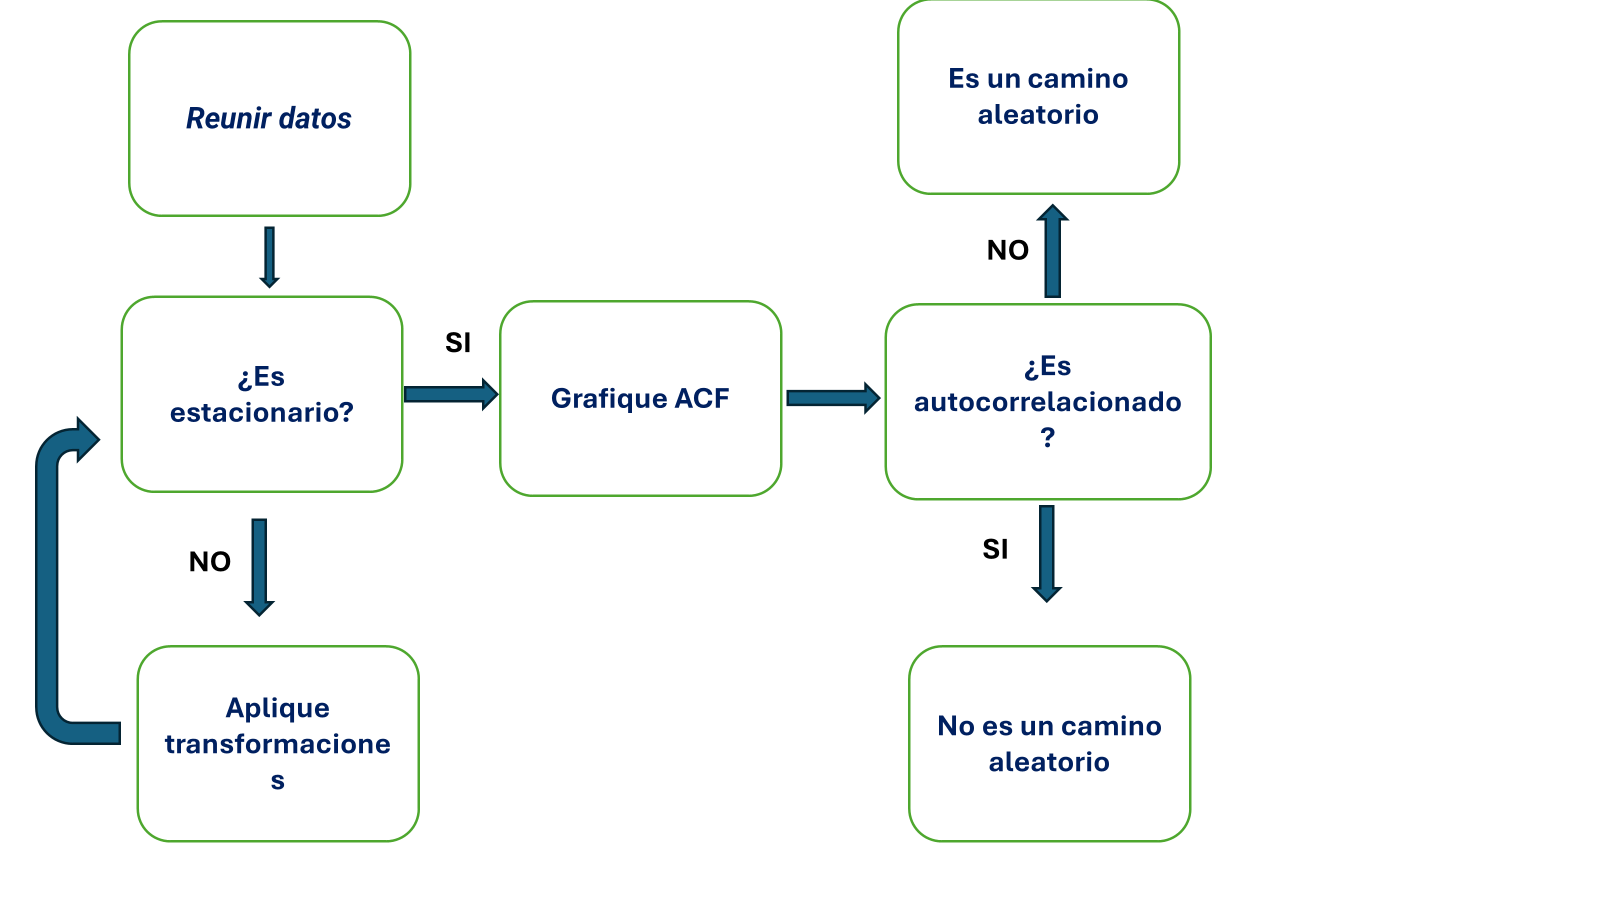

# **3.5 Ejercicios**
+ Ahora es un buen momento para aplicar las diferentes habilidades que aprendiste en este capítulo.
+ Los siguientes tres ejercicios pondrán a prueba tu conocimiento y comprensión de los recorridos aleatorios y la predicción de un recorrido aleatorio.
+ Los ejercicios están ordenados según su dificultad y el tiempo necesario para completarlos.
+ Las soluciones de los ejercicios 3.5.1 y 3.5.2 están en GitHub: https://
github.com/marcopeix/TimeSeriesForecastingInPython/tree/master/CH03.

# **3.5.1 Simular y pronosticar un paseo aleatorio**
+ Simula un paseo aleatorio diferente al que hemos trabajado en este capítulo. Puedes simplemente cambiar la semilla y obtener nuevos valores:
+ **1. Genera un paseo aleatorio de 500 pasos de tiempo. Siéntete libre de elegir un valor inicial diferente de 0. Además, asegúrate de cambiar la semilla pasando un entero diferente a np.random.seed().**
+ **2. Grafica tu paseo aleatorio simulado.**
+ **3. Prueba de estacionariedad.**
+ **4. Aplica una diferencia de primer orden**
+ **5. Prueba de estacionariedad.**
+ **6. Divide tu paseo aleatorio simulado en un conjunto de entrenamiento que contenga los primeros 400 pasos de tiempo. Los 100 pasos de tiempo restantes serán tu conjunto de prueba.**
+ **7. Aplica diferentes métodos de pronóstico ingenuo y mide el MSE. ¿Qué método produce el MSE más bajo?**
+ **8. Grafica tus pronósticos.**
+ **9. Pronostica el próximo paso de tiempo sobre el conjunto de prueba y mide el MSE. ¿Disminuyó?**
+ **10. Grafica tus pronósticos.**

+ **1. Genera un paseo aleatorio de 500 pasos de tiempo. Siéntete libre de elegir un valor inicial diferente de 0. Además, asegúrate de cambiar la semilla pasando un entero diferente a np.random.seed().**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
np.random.seed(40)

steps = np.random.standard_normal(500)
steps[0] = 10

random_walk = np.cumsum(steps)

+ **2. Grafica tu paseo aleatorio simulado.**

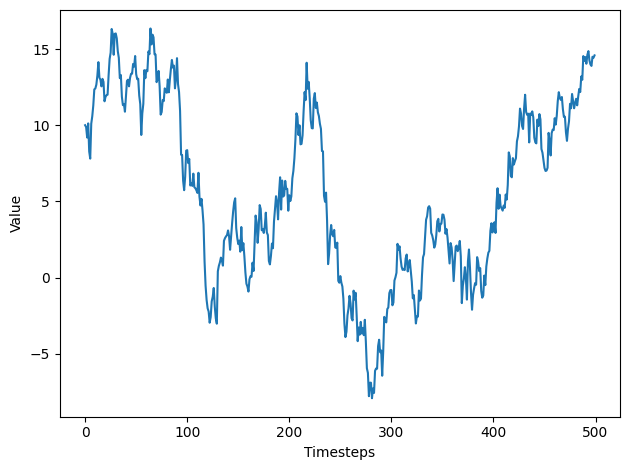

In [ ]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()


+ **3. Prueba de estacionariedad.**

In [ ]:
ADF_result = adfuller(random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}') # si el valor p es menor que 0.05 es estacionario


ADF Statistic: -1.5913356419504006
p-value: 0.4879444456632106



+ **4. Aplica una diferencia de primer orden**

In [ ]:

diff_random_walk = np.diff(random_walk, n=1)


+ **5. Prueba de estacionariedad.**

In [ ]:
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}') # si el valor p es menor que 0.05 es estacionario

ADF Statistic: -21.97352511752583
p-value: 0.0



+ **6. Divide tu paseo aleatorio simulado en un conjunto de entrenamiento que contenga los primeros 400 pasos de tiempo. Los 100 pasos de tiempo restantes serán tu conjunto de prueba.**

In [ ]:
df = pd.DataFrame({'value': random_walk})

train = df[:400]
test = df[400:]

In [ ]:
train.head()

,value
0,10.000000
1,9.873864
2,9.189257
3,10.117972
4,8.273571


In [ ]:
test.head()

,value
400,3.535928
401,3.627021
402,2.928230
403,4.910073
404,5.861157



+ **7. Aplica diferentes métodos de pronóstico ingenuo y mide el MSE. ¿Qué método produce el MSE más bajo?**

## **a. Predecir con la Media**

In [ ]:
## **a. Predecir con la Media hitorica**
mean = np.mean(train.value) # Estamos calculando la medi historica con los train

test.loc[:, 'pred_mean'] = mean # estamos agregando una columna en test con valor la media

test.head() # Mostramos nuestro test de prueba

,value,pred_mean
400,3.535928,4.571965
401,3.627021,4.571965
402,2.928230,4.571965
403,4.910073,4.571965
404,5.861157,4.571965


## **b. Pronosticando con el último valor conocido de la serie de entrenamiento**

In [ ]:
## **b. Pronosticando con el último valor conocido de la serie de entrenamiento**
last_value = train.iloc[-1].value # Ubicamos el último valor de la serie de entrenamiento

test.loc[:, 'pred_last'] = last_value # Estamos agregando a nuestro test una columna cuyo valor sea el último

test.head() # Mostramos nuestro test de prueba

,value,pred_mean,pred_last
400,3.535928,4.571965,2.960159
401,3.627021,4.571965,2.960159
402,2.928230,4.571965,2.960159
403,4.910073,4.571965,2.960159
404,5.861157,4.571965,2.960159


## **c. Usamos el método de la Deriva para pronosticar**

In [ ]:
## **c. Usamos el método de la Deriva para pronosticar**
deltaX = 400 - 0
deltaY = last_value - 10

drift = deltaY / deltaX

x_vals = np.arange(400, 500, 1)

pred_drift = drift * x_vals + 10

test.loc[:, 'pred_drift'] = pred_drift

test.head()

,value,pred_mean,pred_last,pred_drift
400,3.535928,4.571965,2.960159,2.960159
401,3.627021,4.571965,2.960159,2.942559
402,2.928230,4.571965,2.960159,2.924960
403,4.910073,4.571965,2.960159,2.907360
404,5.861157,4.571965,2.960159,2.889760



+ **8. Grafica tus pronósticos.**

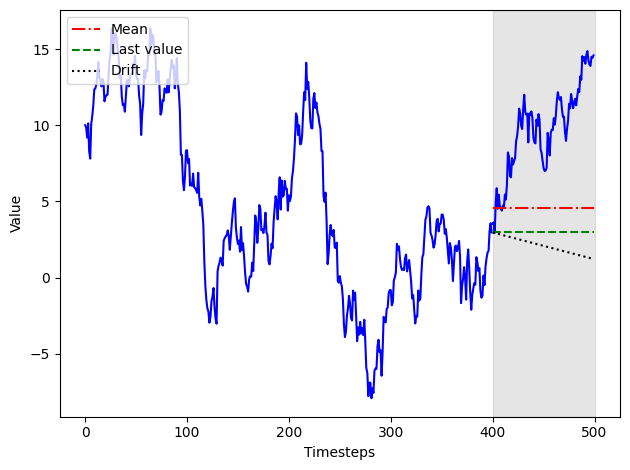

In [ ]:
fig, ax = plt.subplots()

ax.plot(train['value'], 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')

ax.axvspan(400, 500, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

In [ ]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_drift = mean_squared_error(test['value'], test['pred_drift'])
print('MSE para nuestros Pronoticos ingenuos')
print(f'Pronostico con la media Historica MSE = {round(mse_mean,1)}%')

print(f'Pronostico el último valor observado MSE = {round(mse_last,1)}%')

print(f'Pronostico con la Deriva MSE = {round(mse_drift,1)}%')

MSE para nuestros Pronoticos ingenuos
Pronostico con la media Historica MSE = 34.9%
Pronostico el último valor observado MSE = 54.1%
Pronostico con la Deriva MSE = 69.4%



+ **9. Pronostica el próximo paso de tiempo sobre el conjunto de prueba y mide el MSE. ¿Disminuyó?**

In [ ]:
# Forecast the next timestep
df_shift = df.shift(periods=1)

mse_one_step = mean_squared_error(test['value'], df_shift[400:])

print('MSE para nuestros Pronoticos ingenuos')
print(f'Pronostico con la media Historica MSE = {round(mse_mean,1)}%')

print(f'Pronostico el último valor observado MSE = {round(mse_last,1)}%')

print(f'Pronostico con la Deriva MSE = {round(mse_drift,1)}%')
print(f'Pronostico con siguiente paso de tiempo MSE = {round(mse_one_step,1)}%')


MSE para nuestros Pronoticos ingenuos
Pronostico con la media Historica MSE = 34.9%
Pronostico el último valor observado MSE = 54.1%
Pronostico con la Deriva MSE = 69.4%
Pronostico con siguiente paso de tiempo MSE = 0.7%



+ **10. Grafica tus pronósticos.**

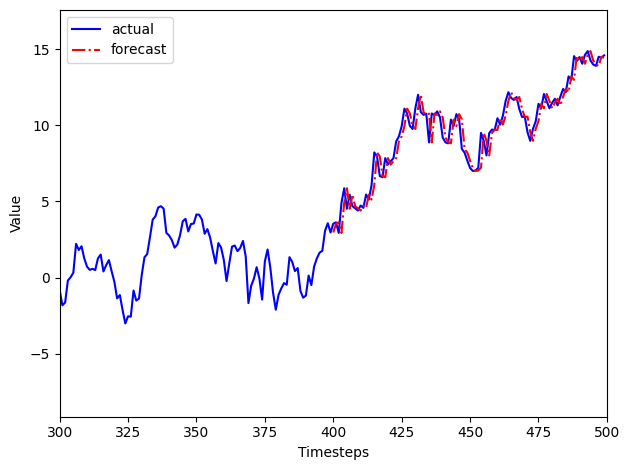

In [ ]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift[400:], 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.xlim(300, 500)
plt.tight_layout()

# **3.5.2 Pronostique el precio de cierre diario de GOOGL**
+ **Utilizando el conjunto de datos de GOOGL con el que trabajamos en este capítulo, aplique las técnicas de pronóstico que hemos analizado y mida su rendimiento:**
+ **1. Conserve los últimos 5 días de datos como un conjunto de prueba. El resto será el conjunto de entrenamiento.**
+ **2. Pronostique los últimos 5 días del precio de cierre utilizando métodos de pronóstico ingenuos y mida el MSE. ¿Cuál es el mejor método?**
+ **3. Dibuje sus pronósticos.**
+ **4. Pronostique el siguiente paso de tiempo sobre el conjunto de prueba y mida el MSE. ¿Disminuyó?**
+ **5. Dibuje sus pronósticos.**

+ **1. Conserve los últimos 5 días de datos como un conjunto de prueba. El resto será el conjunto de entrenamiento.**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
df = pd.read_csv('/content/googl.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


## **a.  Conserve los últimos cinco días para probar sus pronósticos**

In [ ]:
## **a.  Conserve los últimos cinco días para probar sus pronósticos**

googl_train = df[['Date','Close']][:-5]
googl_test = df[['Date','Close']][-5:]

In [ ]:
googl_test

,Date,Close
248,2021-04-21,2278.350098
249,2021-04-22,2252.520020
250,2021-04-23,2299.929932
251,2021-04-26,2309.929932
252,2021-04-27,2290.979980



+ **2. Pronostique los últimos 5 días del precio de cierre utilizando métodos de pronóstico ingenuos y mida el MSE. ¿Cuál es el mejor método?**

## **a. Predecir con la Media hitorica**

In [ ]:
# Forecast the historical mean
mean = np.mean(googl_train['Close'])
googl_test.loc[:, 'pred_mean'] = mean
googl_test.head()

,Date,Close,pred_mean
248,2021-04-21,2278.350098,1689.993184
249,2021-04-22,2252.520020,1689.993184
250,2021-04-23,2299.929932,1689.993184
251,2021-04-26,2309.929932,1689.993184
252,2021-04-27,2290.979980,1689.993184


## **b. Pronosticando con el último valor conocido de la serie de entrenamiento**

In [ ]:

## **b. Pronosticando con el último valor conocido de la serie de entrenamiento**
last_value = googl_train['Close'].iloc[-1]
googl_test.loc[:, 'pred_last'] = last_value
googl_test.head()

,Date,Close,pred_mean,pred_last
248,2021-04-21,2278.350098,1689.993184,2279.01001
249,2021-04-22,2252.520020,1689.993184,2279.01001
250,2021-04-23,2299.929932,1689.993184,2279.01001
251,2021-04-26,2309.929932,1689.993184,2279.01001
252,2021-04-27,2290.979980,1689.993184,2279.01001


## **c. Usamos el método de la Deriva para pronosticar**

In [ ]:
## **c. Usamos el método de la Deriva para pronosticar**


deltaX = len(googl_train)    # The deltaX is basically the length of the training set
deltaY = last_value - googl_train['Close'].iloc[0]    # Remember to subtract the initial value of the training set

drift = deltaY / deltaX

x_vals = np.arange(248, 253, 1)

pred_drift = drift * x_vals + googl_train['Close'].iloc[0]    #A Add the initial value back in the predictions

googl_test.loc[:, 'pred_drift'] = pred_drift

googl_test

,Date,Close,pred_mean,pred_last,pred_drift
248,2021-04-21,2278.350098,1689.993184,2279.01001,2279.010010
249,2021-04-22,2252.520020,1689.993184,2279.01001,2283.075131
250,2021-04-23,2299.929932,1689.993184,2279.01001,2287.140252
251,2021-04-26,2309.929932,1689.993184,2279.01001,2291.205373
252,2021-04-27,2290.979980,1689.993184,2279.01001,2295.270494



## **d. MSE para nuestros Pronoticos ingenuos**


In [ ]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(googl_test['Close'], googl_test['pred_mean'])
mse_last = mean_squared_error(googl_test['Close'], googl_test['pred_last'])
mse_drift = mean_squared_error(googl_test['Close'], googl_test['pred_drift'])
print('MSE para nuestros Pronoticos ingenuos')
print(f'Pronostico con la media Historica MSE = {round(mse_mean,1)}%')

print(f'Pronostico el último valor observado MSE = {round(mse_last,1)}%')

print(f'Pronostico con la Deriva MSE = {round(mse_drift,1)}%')

MSE para nuestros Pronoticos ingenuos
Pronostico con la media Historica MSE = 356026.0%
Pronostico el último valor observado MSE = 447.8%
Pronostico con la Deriva MSE = 293.3%



+ **3. Dibuje sus pronósticos.**

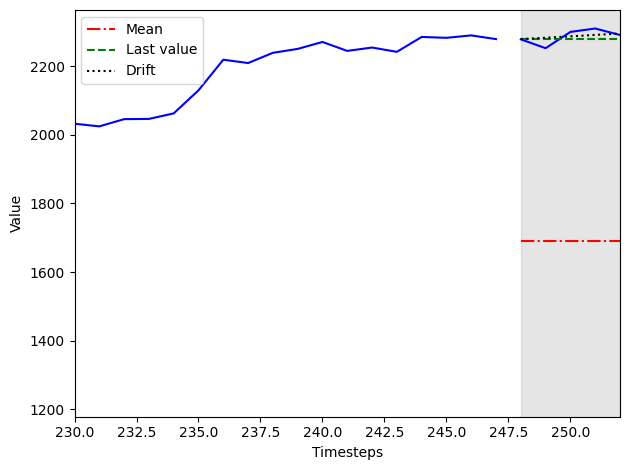

In [ ]:
fig, ax = plt.subplots()

ax.plot(googl_train['Close'], 'b-')
ax.plot(googl_test['Close'], 'b-')
ax.plot(googl_test['pred_mean'], 'r-.', label='Mean')
ax.plot(googl_test['pred_last'], 'g--', label='Last value')
ax.plot(googl_test['pred_drift'], 'k:', label='Drift')

ax.axvspan(248, 252, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.xlim(230, 252)
plt.tight_layout()


+ **4. Pronostique el siguiente paso de tiempo sobre el conjunto de prueba y mida el MSE. ¿Disminuyó?**

In [ ]:
# Forecast the next timestep
df_shift = df.shift(periods=1)

mse_one_step = mean_squared_error(googl_test['Close'], df_shift['Close'].iloc[248:])

print('MSE para nuestros Pronoticos ingenuos')
print(f'Pronostico con la media Historica MSE = {round(mse_mean,1)}%')

print(f'Pronostico el último valor observado MSE = {round(mse_last,1)}%')

print(f'Pronostico con la Deriva MSE = {round(mse_drift,1)}%')

print(f'Pronostico con la Deriva MSE = {round(mse_one_step,1)}%')


MSE para nuestros Pronoticos ingenuos
Pronostico con la media Historica MSE = 356026.0%
Pronostico el último valor observado MSE = 447.8%
Pronostico con la Deriva MSE = 293.3%
Pronostico con la Deriva MSE = 674.9%


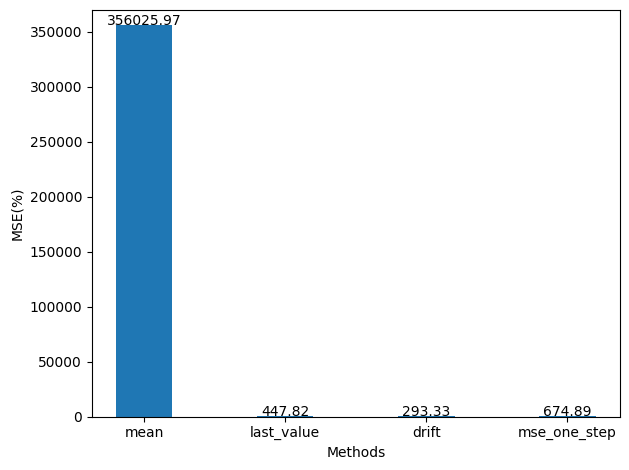

In [ ]:
fig, ax = plt.subplots()

x = ['mean', 'last_value', 'drift', 'mse_one_step']
y = [mse_mean, mse_last, mse_drift, mse_one_step]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MSE(%)')
ax.set_ylim(0, 370000)

for index, value in enumerate(y):
    plt.text(x=index, y=value+5, s=str(round(value, 2)), ha='center')

plt.tight_layout()

plt.savefig('figures', dpi=300)


+ **5. Dibuje sus pronósticos.**

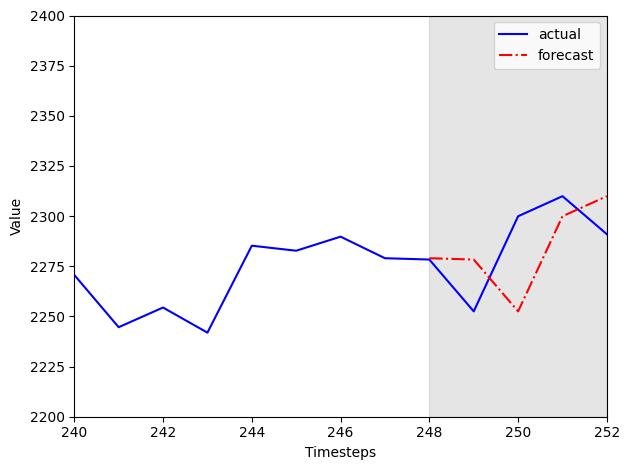

In [ ]:

fig, ax = plt.subplots()

ax.plot(df['Close'], 'b-', label='actual')
ax.plot(df_shift['Close'].iloc[248:], 'r-.', label='forecast')

ax.axvspan(248, 252, color='#808080', alpha=0.2)

ax.legend(loc='best')

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.xlim(240, 252)
plt.ylim(2200, 2400)
plt.tight_layout()

# **Resumen**
+ Un paseo aleatorio es un proceso en el que la primera diferencia es estacionaria y no está autocorrelacionada.
+ No podemos utilizar técnicas estadísticas o de aprendizaje profundo en un paseo aleatorio, ya que se mueve aleatoriamente en el futuro. Por lo tanto, debemos utilizar pronósticos ingenuos.
+ Una serie temporal estacionaria es aquella cuyas propiedades estadísticas (media, varianza, autocorrelación) no cambian con el tiempo.
+ La prueba Dickey-Fuller aumentada (ADF) se utiliza para evaluar la estacionariedad mediante la prueba de raíces unitarias.
+ La hipótesis nula de la prueba ADF es que hay una raíz unitaria en la serie. Si la estadística ADF es un valor negativo grande y el valor p es menor que 0,05, se rechaza la hipótesis nula y la serie es estacionaria.
+ Se utilizan transformaciones para hacer que una serie sea estacionaria. La diferenciación puede estabilizar la tendencia y la estacionalidad, mientras que los logaritmos estabilizan la varianza.
+ La autocorrelación mide la correlación entre una variable y ella misma en un paso de tiempo anterior (retraso). La función de autocorrelación (ACF) muestra cómo cambia la autocorrelación en función del desfase.
+ Lo ideal es pronosticar un recorrido aleatorio en el corto plazo o en el siguiente intervalo de tiempo. De esa manera, no permitimos que se acumulen números aleatorios, lo que degradaría la calidad de nuestros pronósticos en el largo plazo.